# Import dataset "Vehicules"

In [ ]:
'''
import numpy as np
import pandas as pd

df = pd.DataFrame()
path = '.../DS_v0/'
#years = ['2019', '2020',  '2021' ]
years = ['2018f', '2019', '2020',  '2021' ]
#s_df = ["caracteristiques-","lieux-","vehicules-","usagers-"]
s_df = "vehicules-"
k=0;

for year in years:
    data =  pd.read_csv(path + s_df + year + '.csv', delimiter=';')
    df = pd.concat([df, data],ignore_index=True)
    print(year, data.shape)
    k=k+data.shape[0]

#print("Total 2018-2021 : ", k, ';',df.shape[1])
df.head()

'''

# Import dataset Dataset global

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.max_columns = 60
pd.options.display.max_rows = 10

path = 'DS_v0/'

######
years = ['2018f', '2019', '2020',  '2021' ]
s_df = ["carcteristiques","lieux-","vehicules-","usagers-"]
dff = pd.DataFrame()
k=0
i=0
hows='inner'
######

for year in years:
    df_1 =   pd.read_csv(path + "caracteristiques-" + year + '.csv', delimiter=';')
    df_2  =  pd.read_csv(path + "lieux-" + year + '.csv', delimiter=';')
    df_3  =  pd.read_csv(path + "vehicules-" + year + '.csv', delimiter=';')
    df_4 =   pd.read_csv(path + "usagers-" + year + '.csv', delimiter=';')

    merged_df = pd.merge(df_1,      df_2,on=['Num_Acc'], how=hows)
    merged_df = pd.merge(merged_df, df_3,on=['Num_Acc'], how=hows)
    if year=='2018f':
        df = pd.merge(merged_df, df_4,on=['Num_Acc','num_veh'], how=hows)
    else:
        df = pd.merge(merged_df, df_4,on=['Num_Acc','num_veh','id_vehicule'], how=hows)

    dff = pd.concat([dff, df],ignore_index=True)
    print(year, df.shape)
    k=k+df.shape[0]
    i=i+1



print("Total dataset 2018-2021 : ",dff.shape)
print (i)

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_16768/2354790718.py:21: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2  =  pd.read_csv(path + "lieux-" + year + '.csv', delimiter=';')


2018f (130169, 51)
2019 (132977, 54)
2020 (105295, 54)
2021 (129153, 54)
Total dataset 2018-2021 :  (497594, 57)
4


In [3]:
col_veh   = ['Num_Acc','senc','catv','occutc','obs','obsm','choc', 'manv', 'num_veh', 'id_vehicule', 'motor']
col_carac = ['Num_Acc','an','mois','jour','hrmn','lum','agg','int','atm','col','com','adr','gps','lat','long','dep']
col_lieu  = ['Num_Acc','catr','voie','v1','v2','circ','nbv','pr','pr1','vosp','prof','plan','lartpc','larrout','surf',
             'infra','situ','env1','vma']
col_usag  = ['Num_Acc','place','catu','grav','sexe','trajet','secu','locp','actp','etatp','an_nais','num_veh',
             'id_vehicule','secu1','secu2','secu3']

In [4]:
dff[col_veh].shape

(497594, 11)

#### Table des matieres

1. **Etude du Dataset Vehvehicules**
    1.  [Presentation de Dataset](#A.-Presentation-de-Dataset)
    2.  [Types des parametres](#B.-Types-des-parametres)
    3. [Etude de chaque parametre](#C.-Etude-de-chaque-parametre)
       1. [Identification des Nan](#a.-Identification-des-Nan)
       2. [Contenu des variables](#b.-Contenu-des-variables)
       3. [Distribution des variables](#c.-Distribution-des-variables)
       4. [Visualisation de la distribution des variables](#d.-Visualisation-de-la-distribution-des-variables)
    4. [Corrections Dataset à appliquer](#D.-Corrections-Dataset-à-appliquer)
    5. [Coorelations](#C.-Coorelations)
        1. [Variables quantitative et varable cible](#a.-Variables-quantitative-et-varable-cible)
        2. [Variables catégorielles et varable cible (test chi2)](#b.-Variables-catégorielles-et-varable-cible-(test-chi2))
        3. [Variables catégorielles (Cramér's V)](#c.-Variables-catégorielles-(Cramér's-V))
2. **Etude graphique de relations entre parametres et la cible**
    1. [Obstacle fixe heurté](#A.-Obstacle-fixe-heurté)
    2. [Obstacle mobile heurté](#B.-Obstacle-mobile-heurté)
    3. [Choc](#C.-Choc)
    4. [Manoeuvres](#D.-Manoeuvres)
    5. [Catégorie de véhicule](#E.-Catégorie-de-véhicule)
    6. [Quantité de voitures](#F.-Quantité-de-voitures)

## 1. Etude du Dataset Vehvehicules
### A. Presentation de Dataset

In [5]:
pd.set_option('display.max_row',100)
pd.set_option('display.max_column',100)
df_veh = pd.DataFrame()
df_veh = dff[['Num_Acc','senc','catv','occutc','obs','obsm','choc', 'manv', 'num_veh', 
              'id_vehicule', 'motor','grav']]
df_veh.head()

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh,id_vehicule,motor,grav
0,201800000001,0.0,7,0.0,0.0,2.0,3.0,1.0,B01,NaN,NaN,3
1,201800000001,0.0,7,0.0,0.0,2.0,2.0,15.0,A01,NaN,NaN,1
2,201800000002,0.0,7,0.0,0.0,1.0,0.0,1.0,A01,NaN,NaN,1
3,201800000002,0.0,7,0.0,0.0,1.0,0.0,1.0,A01,NaN,NaN,4
4,201800000003,0.0,33,0.0,1.0,2.0,1.0,1.0,A01,NaN,NaN,3


In [6]:
df_veh = dff[['Num_Acc','senc','catv','occutc','obs','obsm','choc', 'manv', 'num_veh', 
              'id_vehicule', 'motor','grav','vma']]

df_veh['vma'].value_counts().sort_index(ascending=True)
#round((df_veh.isna().sum()/df_veh.shape[0]).sort_values(ascending=False)*100,2)

-1.0        5284
 0.0           2
 1.0          84
 2.0          86
 3.0          22
 4.0           7
 5.0         138
 6.0          37
 7.0           6
 8.0           3
 9.0           3
 10.0        668
 12.0          5
 15.0        175
 20.0        877
 25.0         95
 30.0      29457
 35.0         28
 40.0        289
 42.0          4
 45.0        126
 50.0     196307
 55.0          3
 60.0       1107
 65.0          5
 70.0      27610
 75.0          3
 80.0      52897
 90.0      27220
 100.0        67
 110.0     15263
 120.0         2
 130.0      9423
 140.0         2
 180.0         2
 300.0         3
 500.0        77
 501.0         2
 502.0         3
 520.0         3
 560.0         3
 600.0         1
 700.0         7
 770.0         2
 800.0         1
 900.0        11
 901.0         5
Name: vma, dtype: int64

In [7]:
print("Total dataset_veh 2018-2021 : ",df_veh.shape)

Total dataset_veh 2018-2021 :  (497594, 13)


#### Variables

- **Num_Acc**    - Identifiant de l’accident identique\
- **senc**       - Sens de circulation 
 - - - -1 – Non renseigné
0 – Inconnu
1 – PK ou PR ou numéro d’adresse postale croissant
2 – PK ou PR ou numéro d’adresse postale décroissant 3 – Absence de repère

- **id_vehicule** - Identifiant unique du véhicule\
- **Num_Veh**     - Identifiant du véhicule\
- **catv**        - Catégorie du véhicule : 
 - - - 00 – Indéterminable 01 – Bicyclette etc ... 50 – EDP à moteur 60 – EDP sans moteur 80 – VAE 99 – Autre véhicule

-  **obs**          - Obstacle fixe heurté :
 - - - -1 – Non renseigné
0 – Sans objet
1 – Véhicule en stationnement
2 – Arbre
3 – Glissière métallique
4 – Glissière béton
5 – Autre glissière
6 – Bâtiment, mur, pile de pont
7 – Support de signalisation verticale ou poste d’appel d’urgence
8 – Poteau
9 – Mobilier urbain
10 – Parapet
11 – Ilot, refuge, borne haute
12 – Bordure de trottoir
13 – Fossé, talus, paroi rocheuse
14 – Autre obstacle fixe sur chaussée
15 – Autre obstacle fixe sur trottoir ou accotement
16 – Sortie de chaussée sans obstacle
17 – Buse – tête d’aqueduc

- **obsm**          - Obstacle mobile heurté :
 - - -  -1 – Non renseigné
0 – Aucun
1 – Piéton
2 – Véhicule
4 – Véhicule sur rail
5 – Animal domestique 6 – Animal sauvage
9 – Autre

- **choc**    -  Point de choc initial
 - - -  1 - Avant
2 – Avant droit
3 – Avant gauche
4 – Arrière
5 – Arrière droit
6 – Arrière gauche
7 – Côté droit
8 – Côté gauche
9 – Chocs multiples (tonneaux)


- **manv** - Manœuvre principale avant l’accident :

 - - -  -1 – Non renseigné
0 – Inconnue
1 – Sans changement de direction
2 – Même sens, même file
3 – Entre 2 files
4 – En marche arrière
5 – A contresens
6 – En franchissant le terre-plein central
7 – Dans le couloir bus, dans le même sens 8 – Dans le couloir bus, dans le sens inverse 9 – En s’insérant
10 – En faisant demi-tour sur la chaussée **Changeant de file** 11 – A gauche 12 – A droite **Déporté** 13 – A gauche 14 – A droite **Tournant** 15 – A gauche 16 – A droite **Dépassant** 17 – A gauche 18 – A droite **Divers** 19 – Traversant la chaussée 20 – Manœuvre de stationnement 21 – Manœuvre d’évitement 22 – Ouverture de porte 23 – Arrêté (hors stationnement) 24 – En stationnement (avec occupants) **25 – Circulant sur trottoir
26 – Autres manœuvres** 25,26 depuis 2019
- **motor** - Type de motorisation du véhicule :
 - - - -1 – Non renseigné
0 – Inconnue
1 – Hydrocarbures
2 – Hybride électrique 3 – Electrique
4 – Hydrogène 5 – Humaine
6 – Autre

- **occutc** - Nombre d’occupants dans le transport en commun.



### B. Types des parametres

[Cliquer pour aller sur la Table des matieres](#Table-des-matieres)

| Name          | Type initial   | Type proposé |
| ------------- | -------------- | ------------ |
| Num_Acc       | int64          | **object**       |
| senc          | float64        | **object**       |
| catv          | int64          | **object**       |
| occutc        | float64        | float64      |
| obs           | float64        | **object**       |
| obsm          | float64        | **object**       |
| choc          | float64        | **object**       |
| manv          | float64        | **object**       |
| num_veh       | object         | object       |
| id_vehicule   | object         | object       |
| motor         | float64        | **object**       |
| grav          | int64          | **object**       |


In [8]:
df_veh.shape
df_veh.dtypes.value_counts()#.plot.pie()

float64    8
int64      3
object     2
dtype: int64

In [9]:
df_veh.dtypes

Num_Acc          int64
senc           float64
catv             int64
occutc         float64
obs            float64
obsm           float64
choc           float64
manv           float64
num_veh         object
id_vehicule     object
motor          float64
grav             int64
vma            float64
dtype: object

In [10]:
# Code pour convertir en type object
for i in df_veh:
    if i == 'occutc':
        df_veh[i] = df_veh[i].astype('float64')
    else:
        df_veh[i] = df_veh[i].astype('object')    

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/2128308012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_veh[i] = df_veh[i].astype('object')
/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/2128308012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_veh[i] = df_veh[i].astype('float64')


In [11]:
#Verification 
df_veh.dtypes

Num_Acc         object
senc            object
catv            object
occutc         float64
obs             object
obsm            object
choc            object
manv            object
num_veh         object
id_vehicule     object
motor           object
grav            object
vma             object
dtype: object

### C. Etude de chaque parametre

[Cliquer pour aller sur la Table des matieres](#Table-des-matieres )

#### a. Identification des Nan

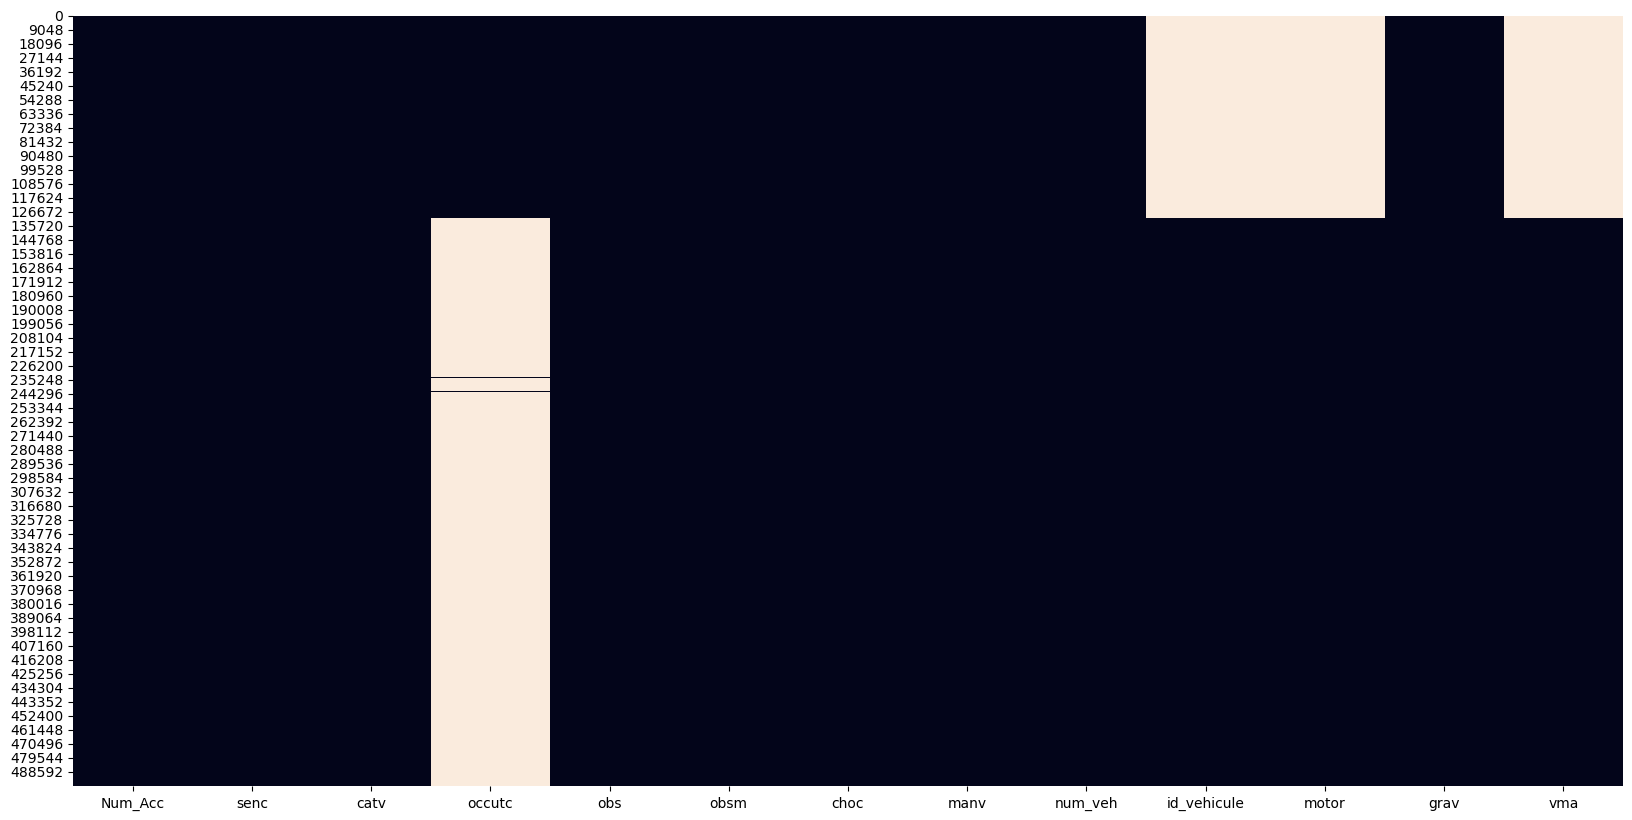

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df_veh.isna(),cbar=False)
plt.show()

In [13]:
round((df_veh.isna().sum()/df_veh.shape[0]).sort_values(ascending=False)*100,2)

occutc         72.95
id_vehicule    26.16
motor          26.16
vma            26.16
obs             0.04
senc            0.04
manv            0.03
choc            0.03
obsm            0.03
Num_Acc         0.00
catv            0.00
num_veh         0.00
grav            0.00
dtype: float64

Concusions  : 
- Il manque 72% des données sur le nombre d'occupants dans les transports en commun depuis 2019
- Il manque 26% des types de moteur, ajoutés depuis 2019

#### b. Contenu des variables

| Name          | Quantité des catégories | À supprimer                | À remplacer            |
| ------------- |:-----------------------:| --------------------------:| ----------------------:|
| Num_Acc       | -                       | RAS                        | RAS                    |
| senc          | 4                       | nan(4%)                    | -1 par NaN             |
| catv          | 31                      | RAS                        | -1 par NaN             |
| occutc        | -                       | Nan(73%), valeurs abber?   | RAS                    |
| obs           | 18                      | Nan(4%)                    | -1 par NaN             |
| obsm          | 7                       | Nan(3%)                    | -1 par NaN             |
| choc          | 10                      | Nan(3%)                    | -1 par NaN             |
| manv          | 27                      | Nan(3%)                    | -1 par NaN             |
| num_veh       | -                       | '[01' '\01' ']01'          | RAS                    |
| id_vehicule   | -                       | nan(26%)                   | Remplacer '\xa' dans '138\xa0306' |
| motor         | 7                       | Nan(26%)                   | -1 par NaN             |
| grav          | 4                       | RAS                        | -1 par NaN             |


In [14]:
import matplotlib.pyplot as plt 


for col in df_veh.select_dtypes(['float','object']):
    print(f'{col :-<20}, {df_veh[col].unique()}')

Num_Acc-------------, [201800000001 201800000002 201800000003 ... 202100056516 202100056517
 202100056518]
senc----------------, [0.0 1.0 2.0 nan 3.0 -1.0]
catv----------------, [7 33 1 2 30 32 13 10 15 21 34 31 3 17 35 99 38 14 36 37 39 20 16 40 42 50
 80 60 0 43 41 -1]
occutc--------------, [  0.  38.   1.   6.   3.  16.  45.  70.   2.  21.  10.  31.   5.  49.
  52.   4.  12.   7.  50.  46.  42.  20.  15.  30.  27.  28.  19.  40.
  13.  44.  41.  39.  64.   8.  25.  54.  18.   9.  48.  59.  11. 100.
  17. 128. 153.  47.  57.  60.  36.  22.  77.  26.  62.  29. 200. 150.
  35. 120.  24.  53.  66.  80.  63.  75.  43. 180.  55.  14. 900. 105.
  51.  32.  33.  99.  71.  23.  78.  61.  81.  nan  34.]
obs-----------------, [0.0 1.0 6.0 8.0 16.0 13.0 9.0 12.0 3.0 14.0 10.0 2.0 7.0 15.0 11.0 4.0
 5.0 nan 17.0 -1.0]
obsm----------------, [2.0 1.0 0.0 9.0 6.0 5.0 4.0 nan -1.0]
choc----------------, [3.0 2.0 0.0 1.0 7.0 8.0 4.0 6.0 9.0 5.0 nan -1.0]
manv----------------, [1.0 15.0 24.0 0.0 21.0 

In [15]:
#Code pour regarder le contenu de chaque paramètre
col_veh   = ['Num_Acc','senc','catv','occutc','obs','obsm','choc', 'manv', 'num_veh', 'id_vehicule', 'motor']
col = 'obs'
#Calcul du nombre de catégories dans les colonnes
print(df_veh[col].value_counts(dropna=False).sort_index(ascending=True).nunique())

#Afichage
df_veh[col].value_counts(dropna=False).sort_index(ascending=True)

#df_veh.dtypes
#df_veh['occutc'].describe()

20


-1.0        104
 0.0     418259
 1.0      11610
 2.0       8620
 3.0       7410
 4.0       7457
 5.0        946
 6.0       6680
 7.0       1729
 8.0       6280
 9.0       2550
 10.0       654
 11.0       966
 12.0      3681
 13.0     10516
 14.0      3820
 15.0      3304
 16.0      2328
 17.0       460
 NaN        220
Name: obs, dtype: int64

In [16]:
#print(df_veh['catv'].nunique())

In [17]:
#df_veh['num_veh'].value_counts()
#df_veh=df_veh(df_veh[df_veh['num_veh'].isin(['\01', 'LB01', 'Z02', 'C02', ']01'])].index)


#### c. Distribution des variables

In [18]:
for col in df_veh : 
 print(col)
 print(df_veh[col].value_counts(normalize=True))

Num_Acc
201800017680    0.000102
201800019383    0.000092
201800013008    0.000088
201800029284    0.000078
201800006589    0.000076
                  ...   
201800034763    0.000002
201900037942    0.000002
201800034760    0.000002
201800034759    0.000002
201900001250    0.000002
Name: Num_Acc, Length: 220885, dtype: float64
senc
 1.0    0.456878
 2.0    0.337088
 3.0    0.106104
 0.0    0.097347
-1.0    0.002583
Name: senc, dtype: float64
catv
 7     0.636378
 33    0.068894
 10    0.066629
 1     0.043694
 2     0.034375
 30    0.028417
 32    0.020205
 31    0.017090
 34    0.011901
 37    0.009592
 15    0.007974
 50    0.006917
 14    0.006759
 17    0.006347
 3     0.006061
 99    0.005048
 13    0.003583
 38    0.003563
 43    0.003350
 80    0.002396
 21    0.002114
 36    0.001740
 20    0.001694
 40    0.001551
 0     0.001367
 60    0.001174
 39    0.000348
 16    0.000348
 35    0.000245
 42    0.000147
 41    0.000086
-1     0.000012
Name: catv, dtype: float64
occutc
0.0

**Variable quantitative**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

occutc_mean = df['occutc'].mean()
print('Moyenne de "occutc":', occutc_mean)


occutc_std = df['occutc'].std()
print('Écart-type de "occutc":', occutc_std)


occutc_median = df['occutc'].median()
print('Médiane de "occutc":', occutc_median)

occutc_min = df['occutc'].min()
occutc_max = df['occutc'].max()
print('Minimum de "occutc":', occutc_min)
print('Maximum de "occutc":', occutc_max)

Moyenne de "occutc": 3.3562453806356247
Écart-type de "occutc": 4.527062749179659
Médiane de "occutc": 1.0
Minimum de "occutc": 0.0
Maximum de "occutc": 28.0


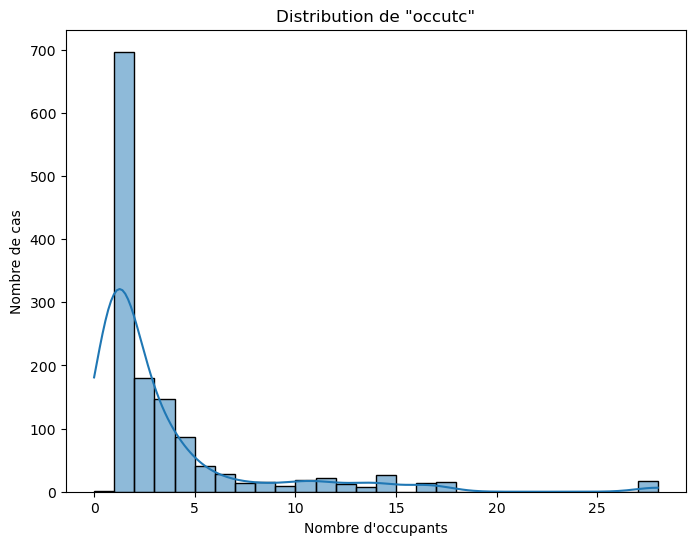

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='occutc', bins=28, kde=True)
plt.title('Distribution de "occutc"')
plt.xlabel('Nombre d\'occupants')
plt.ylabel('Nombre de cas')
plt.show()


| Name    | Quantité des catégories | Équilibre
| ------- |:-----------------------:| ---------
| senc    | 4                       | Déséquilibré (45% val_1 ; 33% - val_2)
| catv    | 31                      | Déséquilibré (63% val_7) 
| occutc  | -                       | Déséquilibré
| obs     | 18                      | Déséquilibré (84% val_0) 
| obsm    | 7                       | Déséquilibré (64% val_2; 18% val_0 ; 15% val_1)
| choc    | 10                      | Déséquilibré (36% val_1; 15% val_3 ; 13% val_2)
| manv    | 27                      | Déséquilibré (42% val_1; 11% val_2 ; 7%  val_15)
| motor   | 7                       | Déséquilibré (83% val_1) 
| grav    | 4                       | Déséquilibré (41% val_1 ; 39% - val_4)


#### d. Visualisation de la distribution des variables

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/2221683961.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)
/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/2221683961.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xticks)
/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/2221683961.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xticks)
/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/2221683961.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(xticks)


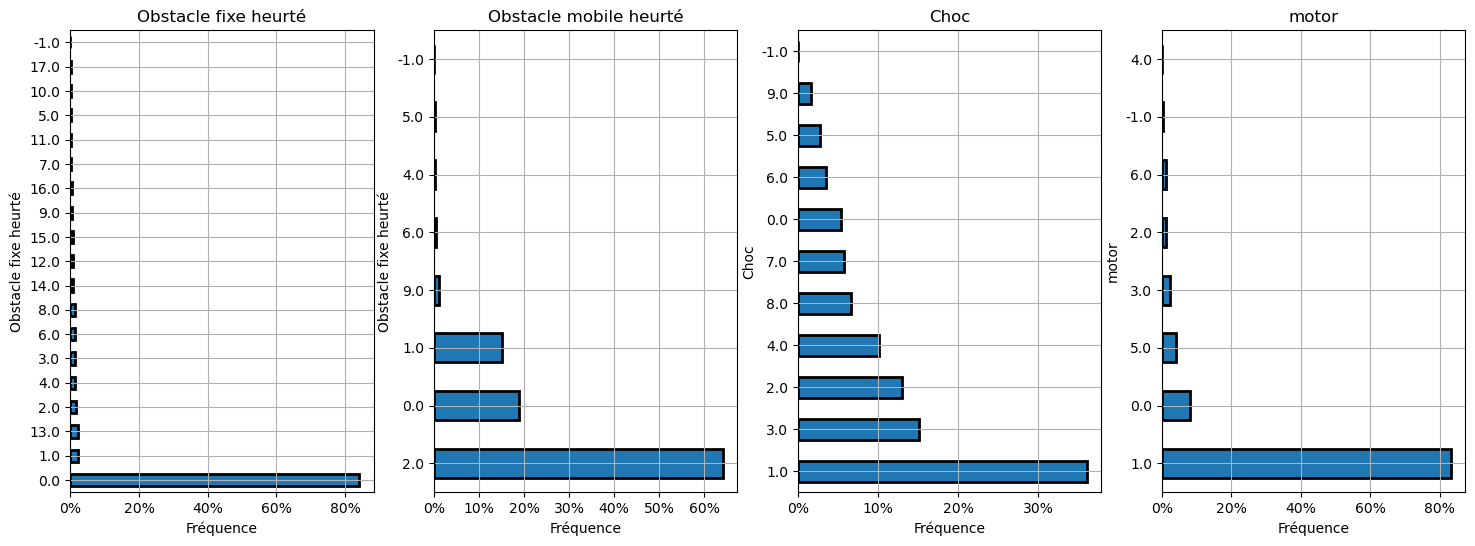

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/2221683961.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)
/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/2221683961.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xticks)
/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/2221683961.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(xticks)


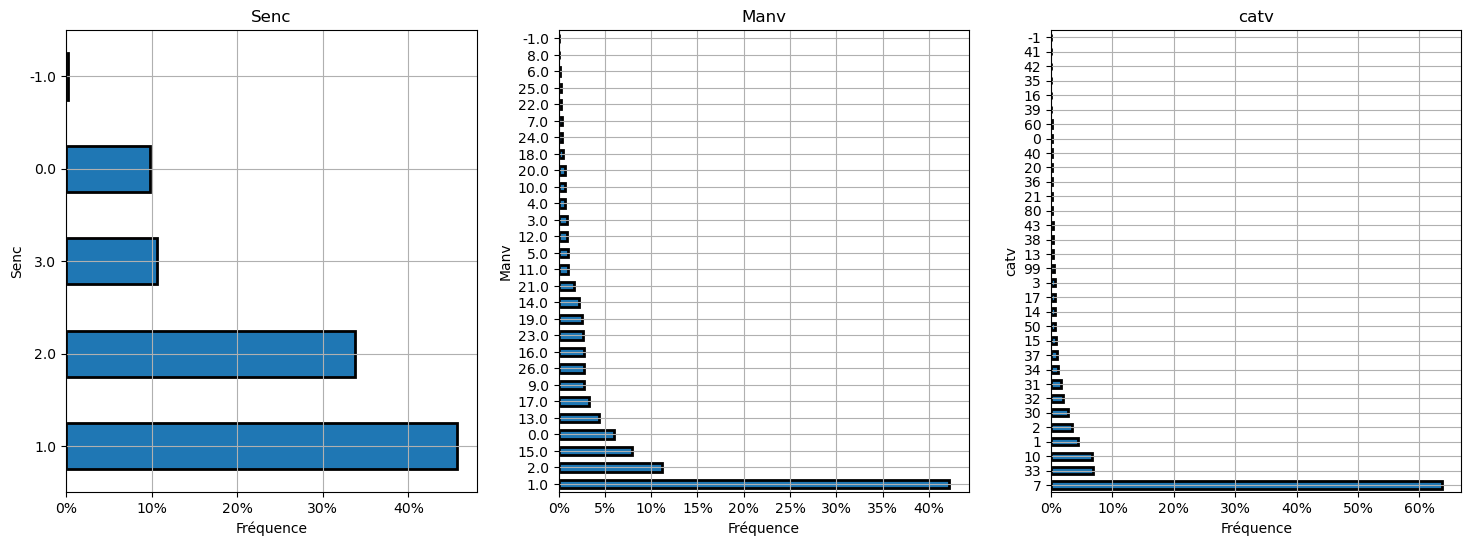

In [21]:
f, axes = plt.subplots(1, 4, figsize=(18, 6))

ax = df_veh['obs'].value_counts(normalize=True).plot(kind ='barh', edgecolor='black', linewidth=2,ax=axes[0])

xticks = ['{:,.0%}'.format(y) for y in ax.get_xticks()]
ax.set_xticklabels(xticks)
ax.set_xlabel('Fréquence')
ax.set_ylabel('Obstacle fixe heurté')
ax.set_title('Obstacle fixe heurté')
ax.grid(True)

ax1 = df_veh['obsm'].value_counts(normalize=True).plot(kind ='barh', edgecolor='black', linewidth=2,ax=axes[1])
xticks = ['{:,.0%}'.format(y) for y in ax1.get_xticks()]
ax1.set_xticklabels(xticks)
ax1.set_xlabel('Fréquence')
ax1.set_ylabel('Obstacle fixe heurté')
ax1.set_title('Obstacle mobile heurté')
ax1.grid(True)



ax2 = df_veh['choc'].value_counts(normalize=True).plot(kind ='barh', edgecolor='black', linewidth=2,ax=axes[2])

xticks = ['{:,.0%}'.format(y) for y in ax2.get_xticks()]
ax2.set_xticklabels(xticks)
ax2.set_xlabel('Fréquence')
ax2.set_ylabel('Choc')
ax2.set_title('Choc')
ax2.grid(True)


ax3 = df_veh['motor'].value_counts(normalize=True).plot(kind ='barh', edgecolor='black', linewidth=2,ax=axes[3])

xticks = ['{:,.0%}'.format(y) for y in ax3.get_xticks()]
ax3.set_xticklabels(xticks)
ax3.set_xlabel('Fréquence')
ax3.set_ylabel('motor')
ax3.set_title('motor')
ax3.grid(True)


plt.show()
##########
f, axes = plt.subplots(1, 3, figsize=(18, 6))

ax = df_veh['senc'].value_counts(normalize=True).plot(kind ='barh', edgecolor='black', linewidth=2,ax=axes[0])

xticks = ['{:,.0%}'.format(y) for y in ax.get_xticks()]
ax.set_xticklabels(xticks)
ax.set_xlabel('Fréquence')
ax.set_ylabel('Senc')
ax.set_title('Senc')
ax.grid(True)

ax1 = df_veh['manv'].value_counts(normalize=True).plot(kind ='barh', edgecolor='black', linewidth=2,ax=axes[1])
xticks = ['{:,.0%}'.format(y) for y in ax1.get_xticks()]
ax1.set_xticklabels(xticks)
ax1.set_xlabel('Fréquence')
ax1.set_ylabel('Manv')
ax1.set_title('Manv')
ax1.grid(True)



#ax2 = df_veh['num_veh'].value_counts(normalize=True).plot(kind ='barh', edgecolor='black', linewidth=2,ax=axes[2])

#xticks = ['{:,.0%}'.format(y) for y in ax2.get_xticks()]
#ax2.set_xticklabels(xticks)
#ax2.set_xlabel('Fréquence')
#ax2.set_ylabel('Num_veh')
#ax2.set_title('Num_veh')
#ax2.grid(True)


ax3 = df_veh['catv'].value_counts(normalize=True).plot(kind ='barh', edgecolor='black', linewidth=2,ax=axes[2])

xticks = ['{:,.0%}'.format(y) for y in ax3.get_xticks()]
ax3.set_xticklabels(xticks)
ax3.set_xlabel('Fréquence')
ax3.set_ylabel('catv')
ax3.set_title('catv')
ax3.grid(True)

### D. Corrections Dataset à appliquer 

[Cliquer pour aller sur la Table des matieres](#Table-des-matieres )

| Name          | Quantité des catégories | À supprimer                | À remplacer                   |
| ------------- |:-----------------------:| --------------------------:| ----------------------------:|
| Num_Acc       | -                       | RAS                        | RAS                           |
| senc          | 4                       | nan(4%)                    | -1 par Nan                    |
| catv          | 31                      | RAS                        | -1 par Nan                    |
| occutc        | -                       | Nan(73%), valeurs abber?   | RAS                           |
| obs           | 18                      | Nan(4%)                    | -1 par Nan                    |
| obsm          | 7                       | Nan(3%)                    | -1 par Nan                    |
| choc          | 10                      | Nan(3%)                    | -1 par Nan                    |
| manv          | 27                      | Nan(3%)                    | -1 par Nan                    |
| num_veh       | -                       | '[01' '\01' ']01'          | RAS                           |
| id_vehicule   | -                       | nan(26%)                   | Remplacer '\xa' dans '138\xa0306' |
| motor         | 7                       | Nan(26%)                   | -1 par Nan                    |
| grav          | 4                       | RAS                        | -1 par Nan                    |


In [22]:
#remplacement des -1 par Nan
# Dans la variable id_vehicule il faut remplacer '\xa' par '' : 138\xa0306 -> 1380306
df['id_vehicule'] = df['id_vehicule'].str.replace('\xa0', '')
df_veh = df_veh.replace(-1, np.nan)

## Dans la variable num_veh, il faut supprimer les erreurs de frappe '\01' et ']01'
df_veh=df_veh.drop(df_veh[df_veh['num_veh'].isin(['\01',']01'])].index)
#df_veh=df_veh.drop(df_veh[df_veh['num_veh'].isin(['\01', 'LB01', 'Z02', 'C02', ']01'])].index)

#Sauvegarde dataset
#df_veh.to_csv('df_veh_test.csv', index=False)

In [23]:
pd.options.display.max_rows = 75
df_veh['num_veh'].value_counts()

A01     300324
B01     166772
C01      19643
D01       4292
Z01       4044
E01       1147
F01        374
Y01        225
G01        154
R01        109
T01         67
H01         65
B02         56
I01         38
J01         24
K01         23
M01         22
X01         22
L01         17
AA01        11
CA01         9
SA01         9
FA01         8
MA01         8
V01          7
P01          7
[01          6
TA01         6
W01          6
LA01         5
Q01          5
AB01         5
BA01         4
BB01         4
RA01         4
PA01         4
DA01         4
N01          4
O01          4
F02          3
SB01         3
U01          3
NA01         3
VB01         3
MB01         3
EA01         2
KA01         2
HB01         2
TB01         2
ZZ01         2
EB01         2
CB01         2
GA01         2
XA01         1
HA01         1
GB01         1
KD01         1
YA01         1
DB01         1
FB01         1
IA01         1
A02          1
MV01         1
IB01         1
PB01         1
AY01         1
WB01      

In [24]:
df_veh.to_csv('df_veh_test.csv', index=False)

In [25]:
print(df_veh.isna().sum())
#df_nan=df_veh.dropna()
#print(df_nan.isna().sum())

Num_Acc             0
senc             1460
catv                6
occutc         363009
obs               324
obsm              324
choc              301
manv              273
num_veh             0
id_vehicule    130169
motor          130980
grav               60
vma            135453
dtype: int64


### C. Coorelations

[Cliquer pour aller sur la Table des matieres](#Table-des-matieres )

### a. Variables quantitative et varable cible

In [26]:
import scipy.stats as stats

groups = df_veh.groupby('grav')

# Extraire les valeurs de "occutc" pour chaque groupe
group1 = groups.get_group(1)['occutc'].dropna()
group2 = groups.get_group(2)['occutc'].dropna()
group3 = groups.get_group(3)['occutc'].dropna()
group4 = groups.get_group(4)['occutc'].dropna()


# test ANOVA
fvalue, pvalue = stats.f_oneway(group1, group2, group3, group4)

print('F-value:', fvalue)
print('p-value:', pvalue,)

F-value: 58.168037302460995
p-value: 1.4338089295743684e-37


### b. Variables catégorielles et varable cible (test chi2)

In [27]:
#df_veh.isnull().sum()
#df_nan.isna().sum()
df_veh.head()
print(df_veh.shape)

(497593, 13)


In [28]:
#df_cor=df_veh[['senc','catv','obs','obsm','choc', 'manv', 'num_veh', 'motor','grav']]
df_cor=df_veh[['catv','obs','obsm','choc', 'manv', 'motor','grav']]
#df_cor=df_nan[['senc','catv','obs','obsm','choc', 'manv', 'num_veh', 'motor','grav']]
#df_cor=df[['senc','catv','obs','obsm','choc', 'manv', 'num_veh', 'motor']]

In [29]:
from scipy.stats import chi2_contingency
def is_correlated(col):
    cross = pd.crosstab(index= df_cor[col], columns=df_cor['grav'])
    chi_sq_result = chi2_contingency(cross)
    chi2, p, Dof = chi_sq_result[0], chi_sq_result[1], chi_sq_result[2]
    return p, "correlated" if p < 0.05 else "not-correlated", chi2
results = {}
for col in df_cor.columns:
    p, corr, chi2 = is_correlated(col)
    results[col] = {'p-value': p, 'correlation': corr, 'chi2': chi2}
    print(f"{col:<7}: p-value={p:<38}, correlation={corr:<11}, chi2 = {round(chi2,1)}")

catv   : p-value=0.0                                   , correlation=correlated , chi2 = 88103.7
obs    : p-value=0.0                                   , correlation=correlated , chi2 = 36988.0
obsm   : p-value=0.0                                   , correlation=correlated , chi2 = 29322.7
choc   : p-value=0.0                                   , correlation=correlated , chi2 = 22814.2
manv   : p-value=0.0                                   , correlation=correlated , chi2 = 40028.6
motor  : p-value=0.0                                   , correlation=correlated , chi2 = 9987.5
grav   : p-value=0.0                                   , correlation=correlated , chi2 = 1492599.0


### c. Variables catégorielles (Cramér's V)

In [30]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
col_veh   = ['Num_Acc','senc','catv','occutc','obs','obsm','choc', 'manv', 'num_veh', 'id_vehicule', 'motor']
col_carac = ['Num_Acc','an','mois','jour','hrmn','lum','agg','int','atm','col','com','adr','gps','lat','long','dep']
col_lieu  = ['Num_Acc','catr','voie','v1','v2','circ','nbv','pr','pr1','vosp','prof','plan','lartpc','larrout','surf',
             'infra','situ','env1','vma']
col_usag  = ['Num_Acc','place','catu','grav','sexe','trajet','secu','locp','actp','etatp','an_nais','num_veh',
             'id_vehicule','secu1','secu2','secu3']

#col_cat=dff[['senc','catv','obs','obsm','choc', 'manv', 'num_veh', 'motor',
#                         'catu','sexe','trajet','secu1','secu2','secu3','vma','infra','situ','grav']]

#col_cat = dff.drop(['Num_Acc','lat','long','id_vehicule','adr','hrmn','gps','an_nais'],axis=1)

#col_cat=dff[['catv','obs','obsm','choc', 'manv', 'motor','vma','grav']]
col_cat=dff[['catv','obs','obsm','choc', 'manv','vma','grav']]

col_cat.head()


col_cat['grav'] = col_cat['grav'].replace([1.0, 4.0],0).replace([2.0, 3.0],1)


/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/1271347372.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_cat['grav'] = col_cat['grav'].replace([1.0, 4.0],0).replace([2.0, 3.0],1)


In [32]:
print(col_cat['grav'].value_counts(normalize= True))
print(col_cat['grav'].shape)

 0    0.815440
 1    0.184440
-1    0.000121
Name: grav, dtype: float64
(497594,)


In [33]:
#building of the Cramer's V function
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [34]:
#Building of the matrix
rows= []

for var1 in col_cat:
  col = []
  for var2 in col_cat :
    cramers =cramers_V(col_cat[var1], col_cat[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = col_cat.columns, index =col_cat.columns)

In [35]:
df

,catv,obs,obsm,choc,manv,vma,grav
catv,1.00,0.00,0.00,0.01,0.01,0.00,0.03
obs,0.00,1.00,0.09,0.04,0.02,0.01,0.03
obsm,0.00,0.09,1.00,0.05,0.04,0.02,0.02
choc,0.01,0.04,0.05,1.00,0.07,0.01,0.01
manv,0.01,0.02,0.04,0.07,1.00,0.01,0.02
vma,0.00,0.01,0.02,0.01,0.01,1.00,0.03
grav,0.03,0.03,0.02,0.01,0.02,0.03,1.00


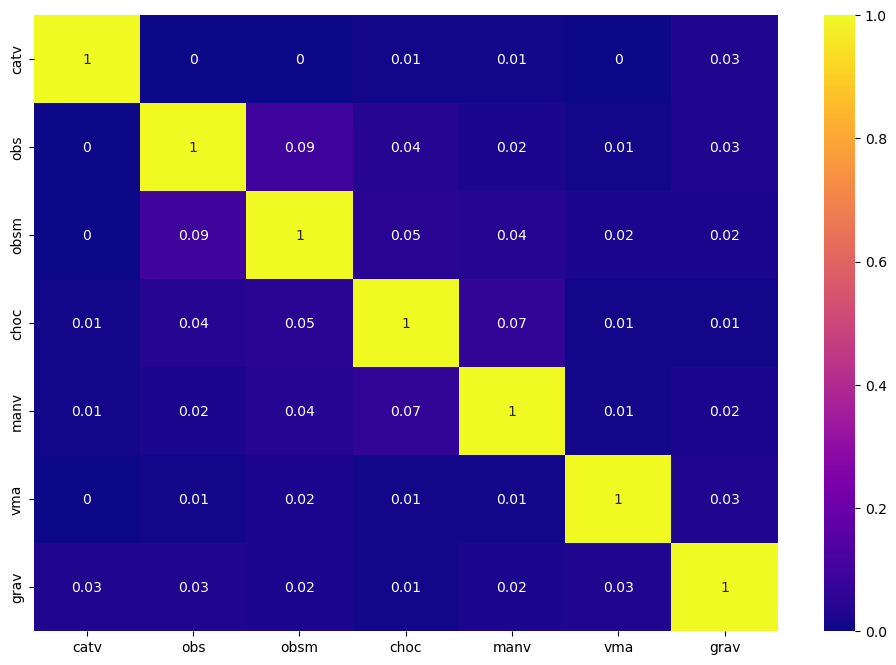

In [36]:
#Creating heatMap

# generating 10x10 matrix of random numbers
data = np.random.randint(low=1,
                         high=100,
                         size=(10, 10))
  
# setting the parameter values
annot = True
plt.figure(figsize=(12, 8))  
# plotting the heatmap
#hm = sns.heatmap(data=df,annot=annot)

hm = sns.heatmap(data=df,annot=annot, cmap='plasma')
#hm = sns.heatmap(data=df,annot=annot)


  
# displaying the plotted heatmap
plt.show()

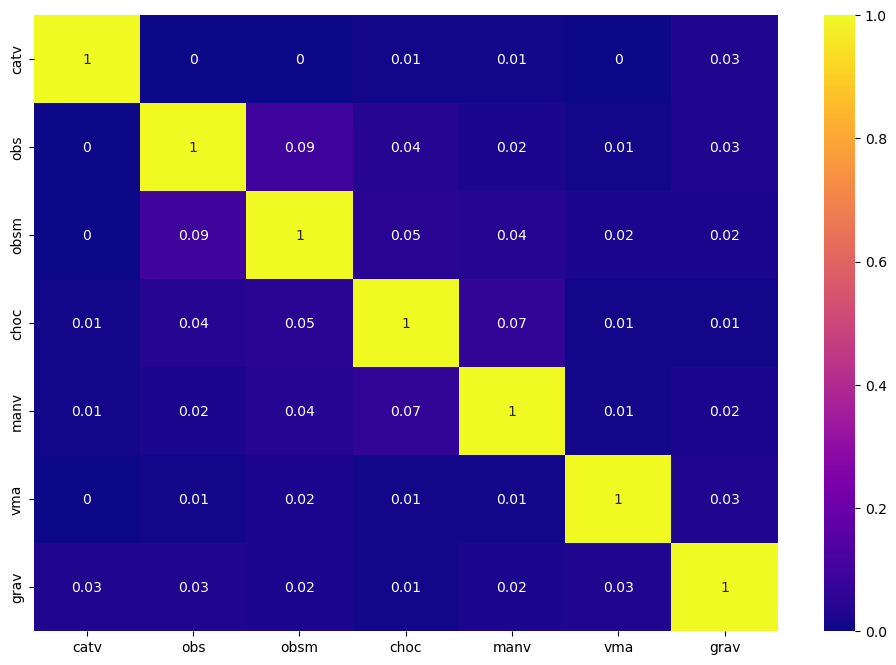

In [37]:

data = np.random.randint(low=1, high=100, size=(10, 10))

# Setting the parameter values
annot = True

plt.figure(figsize=(12, 8))
hm = sns.heatmap(data=df, annot=annot, cmap='plasma')

# Displaying the plotted heatmap
plt.show()

## 2. Etude graphique de relations entre parametres et la cible

[Cliquer pour aller sur la Table des matieres](#Table-des-matieres )

> L'objectif de cette partie est d'étudier l'importance de chaque variable sur la variable cible (niveau de gravité) dans le cadre de l'analyse des accidents routiers. Pour realiser cela on modifie le variable cible de la maniere suivente : 
```
1 – Indemne , 4 – Blessé léger   - categorie 0  :  Pas gave

2 – Tué , 3 – Blessé hospitalisé - categorie 1  :  Grave

```



In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.max_columns = 60
pd.options.display.max_rows = 100


df_veh = pd.read_csv('df_veh_test.csv')
#df_veh_1=df_veh[['catv','obs','obsm','choc', 'manv', 'motor','grav']]
#df_veh_1=df_veh[['catv','obs','obsm','choc', 'manv','grav']]

df_veh_1=dff[['catv','obs','obsm','choc', 'manv','grav']]
df_veh.head()

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/2006336494.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_veh = pd.read_csv('df_veh_test.csv')


,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh,id_vehicule,motor,grav,vma
0,201800000001,0.0,7.0,0.0,0.0,2.0,3.0,1.0,B01,NaN,NaN,3.0,NaN
1,201800000001,0.0,7.0,0.0,0.0,2.0,2.0,15.0,A01,NaN,NaN,1.0,NaN
2,201800000002,0.0,7.0,0.0,0.0,1.0,0.0,1.0,A01,NaN,NaN,1.0,NaN
3,201800000002,0.0,7.0,0.0,0.0,1.0,0.0,1.0,A01,NaN,NaN,4.0,NaN
4,201800000003,0.0,33.0,0.0,1.0,2.0,1.0,1.0,A01,NaN,NaN,3.0,NaN


In [39]:
dd = pd.DataFrame()
dd = df_veh
dd['grav'] = dd['grav'].replace([1.0, 4.0],0).replace([2.0, 3.0],1)

In [40]:
print(df_veh['grav'].value_counts(normalize= True))
print(df_veh['grav'].shape)

0.0    0.815538
1.0    0.184462
Name: grav, dtype: float64
(497593,)


In [41]:
print(df_veh_1.shape)
round((df_veh_1.isna().sum()/df_veh_1.shape[0]).sort_values(ascending=False)*100,2)


(497594, 6)


obs     0.04
manv    0.03
choc    0.03
obsm    0.03
catv    0.00
grav    0.00
dtype: float64

In [42]:
df_nan=df_veh_1.dropna()

In [43]:
print(df_nan.shape)
round((df_nan.isna().sum()/df_nan.shape[0]).sort_values(ascending=False)*100,2)

(497331, 6)


catv    0.0
obs     0.0
obsm    0.0
choc    0.0
manv    0.0
grav    0.0
dtype: float64

In [44]:
df_nan['grav'] = df_nan['grav'].replace([1.0, 4.0],0).replace([2.0, 3.0],1)
print(df_nan.shape)
df_nan['grav'].value_counts(normalize= True)

(497331, 6)


/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/689286256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['grav'] = df_nan['grav'].replace([1.0, 4.0],0).replace([2.0, 3.0],1)


 0    0.815415
 1    0.184465
-1    0.000121
Name: grav, dtype: float64

### A. Obstacle fixe heurté

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/3014550903.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks,fontsize=16, fontweight='bold')


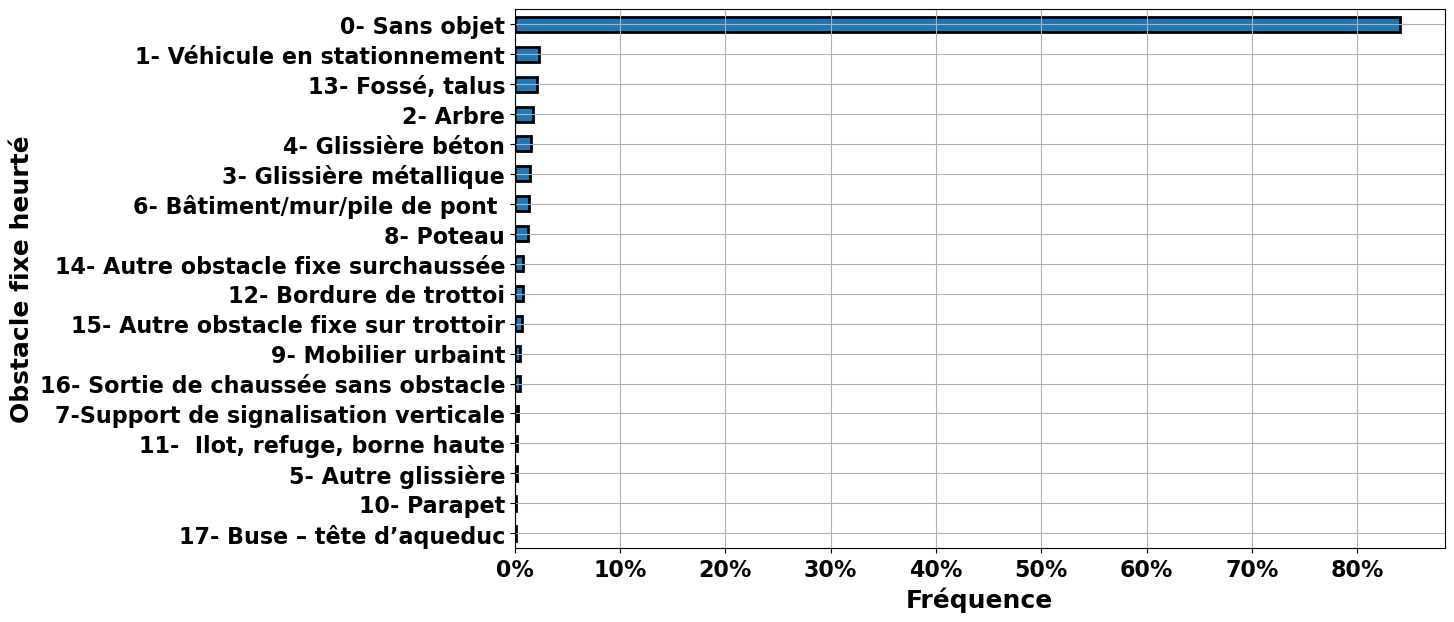

In [45]:
fig = plt.figure(figsize=(12, 7))

labels_obs = ['0- Sans objet','1- Véhicule en stationnement','13- Fossé, talus','2- Arbre','4- Glissière béton',
              '3- Glissière métallique','6- Bâtiment/mur/pile de pont ','8- Poteau','14- Autre obstacle fixe surchaussée','12- Bordure de trottoi','15- Autre obstacle fixe sur trottoir',
             '9- Mobilier urbaint','16- Sortie de chaussée sans obstacle','7-Support de signalisation verticale',
              '11-  Ilot, refuge, borne haute','5- Autre glissière','10- Parapet','17- Buse – tête d’aqueduc'] 

ax = df_veh['obs'].value_counts(normalize=True).plot(kind ='barh', edgecolor='black', linewidth=2)

xticks = ['{:,.0%}'.format(y) for y in ax.get_xticks()]
ax.set_xticklabels(xticks,fontsize=16, fontweight='bold')
ax.set_yticklabels(labels_obs,fontsize=16, fontweight='bold')

ax.set_xlabel('Fréquence',fontsize=18, fontweight='bold')
ax.set_ylabel('Obstacle fixe heurté', fontsize=18, fontweight='bold')
ax.invert_yaxis()

ax.grid(True)
plt.show()

> - **Le graphique représente la fréquence des différents types d'obstacles fixes heurtés lors des accidents de la route. On peut constater que les obstacles les plus courants sont les véhicules en stationnement, les fossés ou les talus, les arbres et les glissières en béton.** 
> - **La majorité des accidents (plus de 85 %) ne déclarent pas la présence d'obstacles fixes, ce qui suggère qu'ils sont causés par d'autres facteurs ...**
> - **Seulement 15 % des accidents déclarent la présence d'obstacles fixes.** 

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/617450410.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=10, fontweight='bold')


<Figure size 1500x600 with 0 Axes>

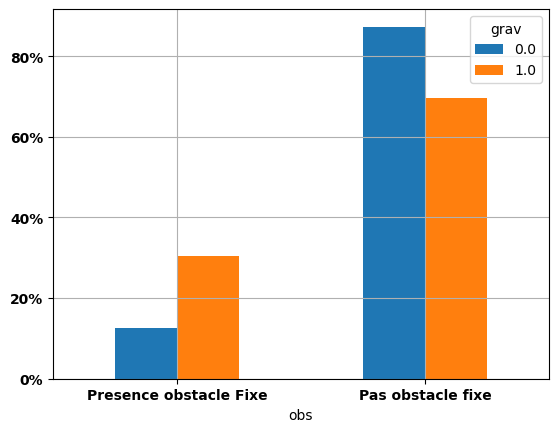

In [46]:
fig = plt.figure(figsize=(15, 6))
ax1= pd.crosstab([dd['obs'] == 0.0], dd['grav'] ,normalize= 'columns').plot.bar()  
ax1.set_xticklabels(['Presence obstacle Fixe','Pas obstacle fixe'], rotation = 0,fontsize=10, fontweight='bold')
ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=10, fontweight='bold')
ax1.grid
ax1.grid(True)
plt.show()

> **La graphique représente la distribution des accidents graves et non-graves en fonction de la présence ou non d'un obstacle fixe. On peut remarquer que parmi les accidents graves (représentés en orange), environ 30% ont impliqué la présence d'un obstacle fixe, ce qui souligne l'importance de prendre en compte ce paramètre dans l'analyse des accidents de la route.**

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/2014121949.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=10, fontweight='bold')
/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/2014121949.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xticks,fontsize=10, fontweight='bold')


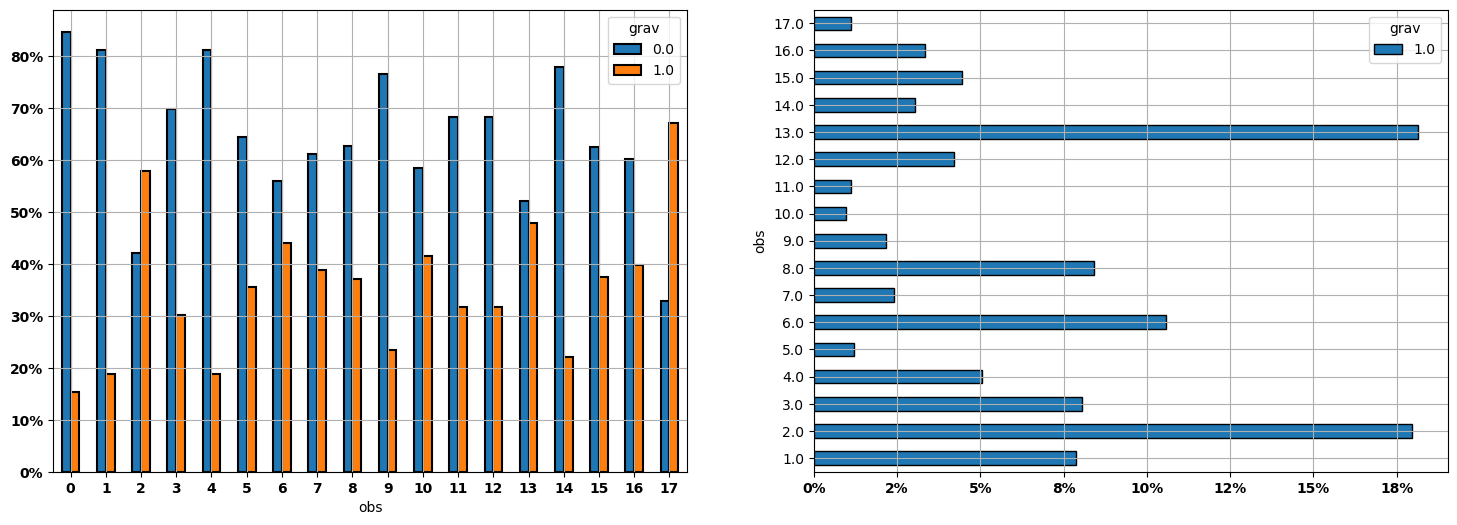

In [47]:
f, axes = plt.subplots(1, 2, figsize=(18, 6))

ax1 = pd.crosstab(dd['obs'], dd['grav'], normalize='index').plot(kind='bar',edgecolor='black', linewidth=1.5,
                                                        ax=axes[0])
ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=10, fontweight='bold')
ax1.set_xticklabels(ax1.get_xticks(),fontsize=10, fontweight='bold',rotation = 0,)
ax1.grid(True)


ax2=pd.crosstab(dd.loc[dd['obs'] != 0.0, 'obs'], dd.loc[dd['grav'] == 1, 'grav'], 
                normalize='columns').plot(kind='barh',edgecolor='black', linewidth=1, ax=axes[1])
xticks = ['{:,.0%}'.format(y) for y in ax2.get_xticks()]
ax2.set_xticklabels(xticks,fontsize=10, fontweight='bold')
ax2.grid(True)
plt.show()


/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/4213423768.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()], fontsize=10, fontweight='bold')


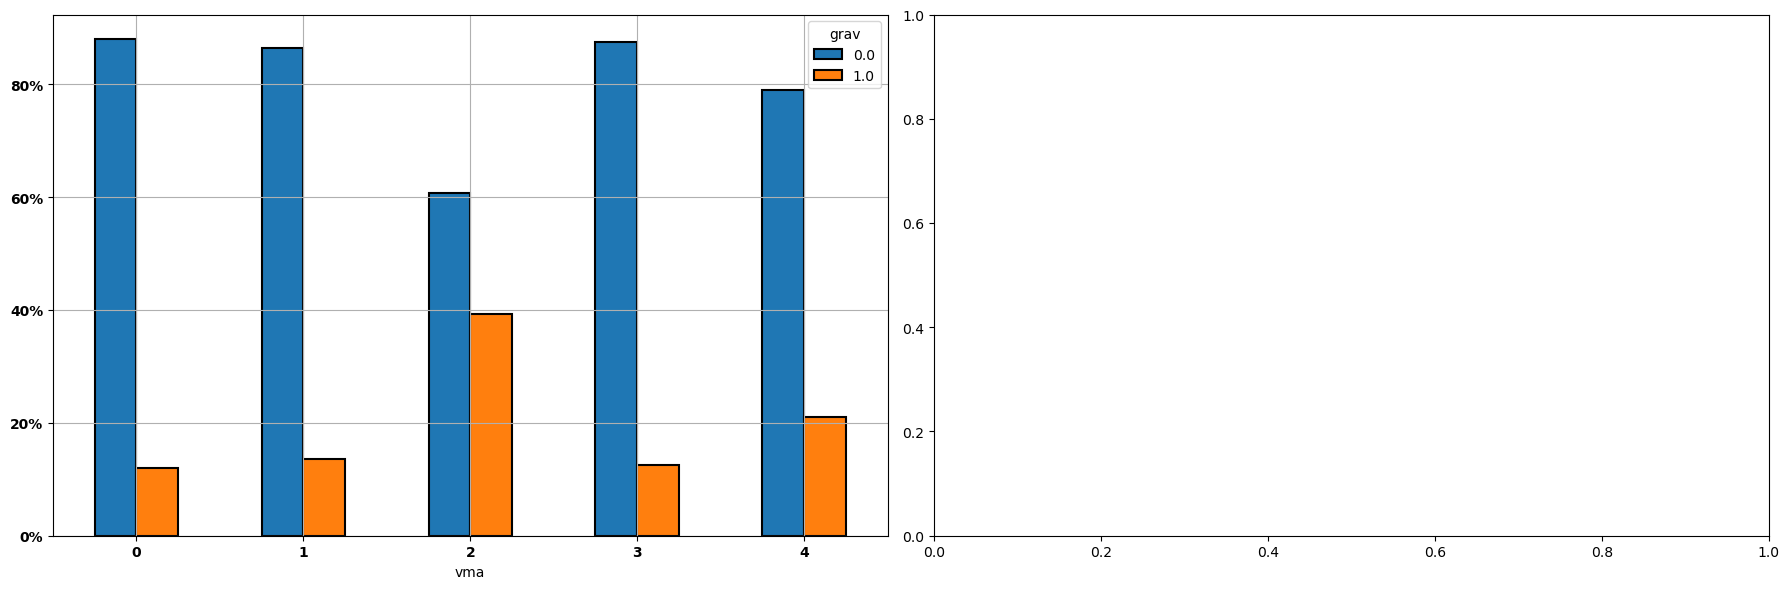

In [48]:
 selected_vma = [30,50, 80, 90, 130]
df_selected_vma = dd[dd['vma'].isin(selected_vma)]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Diagramme en barres
ax1 = pd.crosstab(df_selected_vma['vma'], df_selected_vma['grav'], normalize='index').plot(kind='bar', edgecolor='black', linewidth=1.5, ax=axes[0])
ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()], fontsize=10, fontweight='bold')
ax1.set_xticklabels(ax1.get_xticks(), fontsize=10, fontweight='bold', rotation=0)
ax1.grid(True)

# Autre type de graphique (à remplir selon vos besoins)
# ax2 = ...

plt.tight_layout()
plt.show()

'0- Sans objet','1- Véhicule en stationnement','2- Arbre','3- Glissière métallique','4- Glissière béton',
'5- Autre glissière','6- Bâtiment/mur/pile de pont ','7-Support de signalisation verticale','8- Poteau',
'9- Mobilier urbaint','10- Parapet','11-  Ilot, refuge, borne haute','12- Bordure de trottoi',
'13- Fossé, talus','14- Autre obstacle fixe surchaussée','15- Autre obstacle fixe sur trottoir',
'16- Sortie de chaussée sans obstacle','17- Buse – tête d’aqueduc'

> - **La graphique de gauche montre la proportion de chaque type d'obstacle fixe impliqué dans les accidents graves et non graves. On peut observer que les obstacles "Arbre" et "Buse - tête d'aqueduc" représentent presque 60% et 70% des cas graves, respectivement, par rapport à 42% et 30% des cas non graves pour ces types d'obstacles. Cela suggère que ces deux types d'obstacles ont plus de chances de conduire à des accidents graves.**
> - **La graphique de droite montre la proportion de chaque type d'obstacle fixe impliqué dans les accidents graves. Comme on peut voir deux types d'obstacles les plus fréquents pour les cas graves sont les arbres et les fossés/talus, qui représentent ensemble 36% de tout les cas graves.**

### B. Obstacle mobile heurté

[Cliquer pour aller sur la Table des matieres](#Table-des-matieres )

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/3835962952.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks,fontsize=10, fontweight='bold')


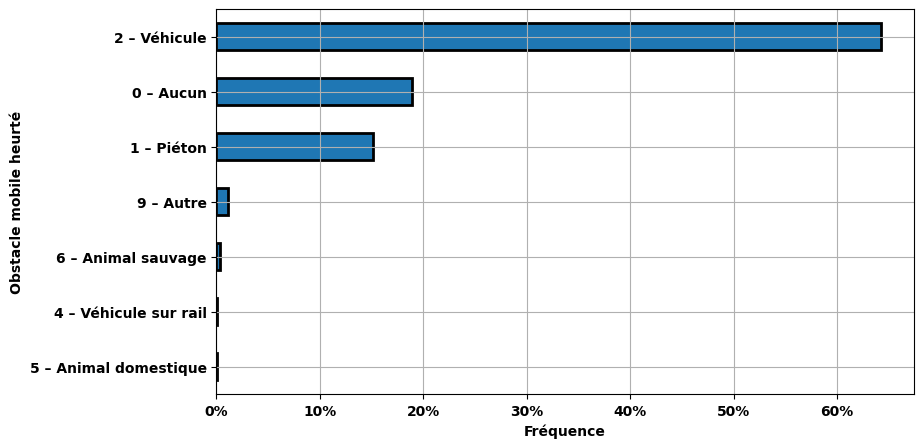

In [49]:
fig = plt.figure(figsize=(9, 5))

labels_obs = ['2 – Véhicule','0 – Aucun','1 – Piéton','9 – Autre','6 – Animal sauvage',
              '4 – Véhicule sur rail','5 – Animal domestique']

ax = df_veh['obsm'].value_counts(normalize=True).plot(kind ='barh', edgecolor='black', linewidth=2)

xticks = ['{:,.0%}'.format(y) for y in ax.get_xticks()]
ax.set_xticklabels(xticks,fontsize=10, fontweight='bold')
ax.set_yticklabels(labels_obs,fontsize=10, fontweight='bold')

ax.set_xlabel('Fréquence',fontsize=10, fontweight='bold')
ax.set_ylabel('Obstacle mobile heurté',fontsize=10, fontweight='bold')
ax.invert_yaxis()

ax.grid(True)
plt.show()

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/2279047221.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=10, fontweight='bold')


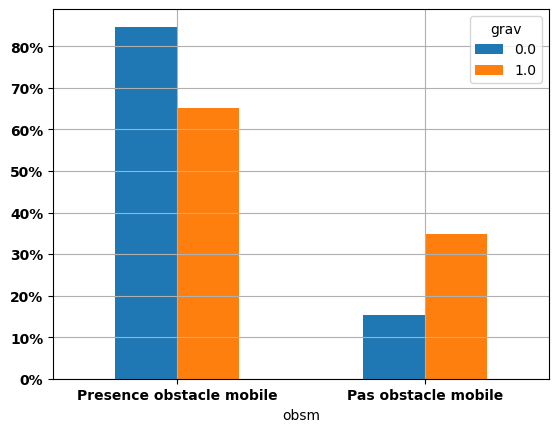

In [50]:
ax1= pd.crosstab([df_veh['obsm'] == 0.0], df_veh['grav'] ,normalize= 'columns').plot.bar()  
ax1.set_xticklabels(['Presence obstacle mobile','Pas obstacle mobile'], rotation = 0,fontsize=10, fontweight='bold')
ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=10, fontweight='bold')
ax1.grid
ax1.grid(True)

> **La graphique représente la distribution des accidents graves et non-graves en fonction de la présence ou non d'un obstacle mobile. On peut remarquer que parmi les accidents graves (représentés en orange), environ 65% ont impliqué la présence d'un obstacle mobile, ce qui souligne l'importance de prendre en compte ce paramètre dans l'analyse des accidents de la route.**

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/4003300433.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=10, fontweight='bold')
/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/4003300433.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xticks,fontsize=10, fontweight='bold')


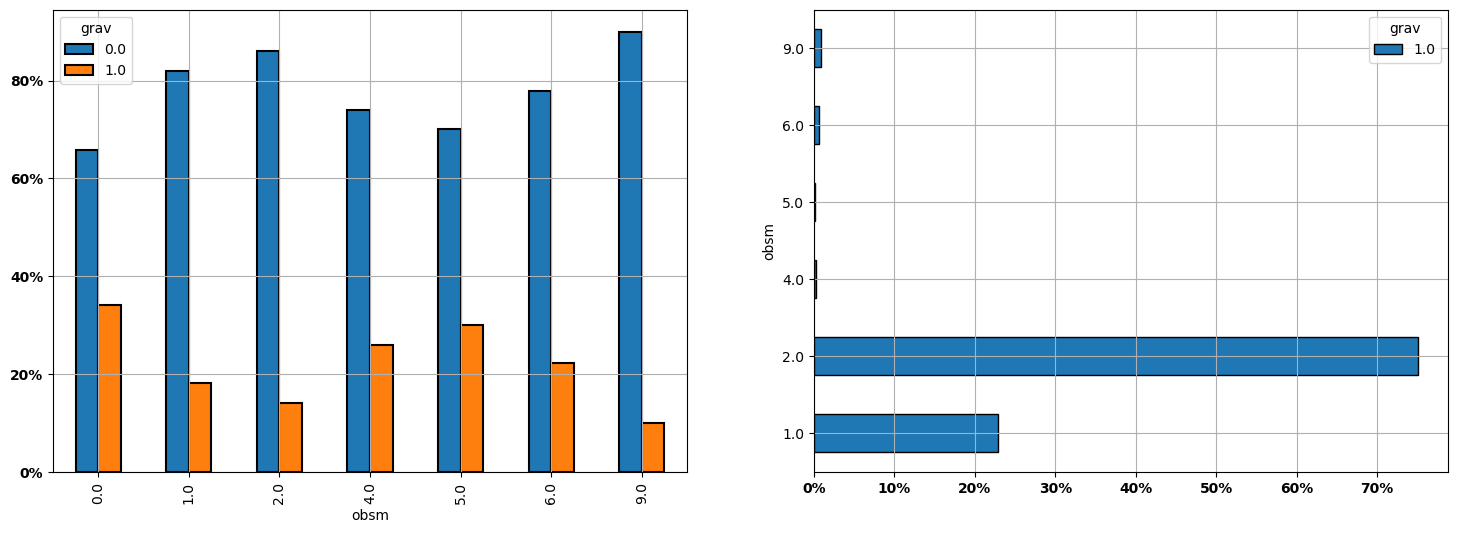

In [51]:
f, axes = plt.subplots(1, 2, figsize=(18, 6))

ax1 = pd.crosstab(df_veh['obsm'], df_veh['grav'], normalize='index').plot(kind='bar',edgecolor='black', linewidth=1.5,
                                                        ax=axes[0])
ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=10, fontweight='bold')
#ax1.set_xticklabels(ax1.get_xticks(),fontsize=10, fontweight='bold',rotation = 0,)
ax1.grid(True)


ax2=pd.crosstab(df_veh.loc[df_veh['obsm'] != 0.0, 'obsm'], df_veh.loc[df_veh['grav'] == 1, 'grav'], 
                normalize='columns').plot(kind='barh',edgecolor='black', linewidth=1, ax=axes[1])
xticks = ['{:,.0%}'.format(y) for y in ax2.get_xticks()]
ax2.set_xticklabels(xticks,fontsize=10, fontweight='bold')
#ax2.set_yticklabels(ax2.get_yticks(),fontsize=11, fontweight='bold')
ax2.grid(True)
plt.show()

In [52]:
df_veh.loc[df_veh['obsm'] != 0.0, 'obsm'].value_counts()

2.0    319403
1.0     75529
9.0      5630
6.0      1875
4.0       482
5.0       381
Name: obsm, dtype: int64

### C. Choc

[Cliquer pour aller sur la Table des matieres](#Table-des-matieres )

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/1364277819.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks,fontsize=10, fontweight='bold')


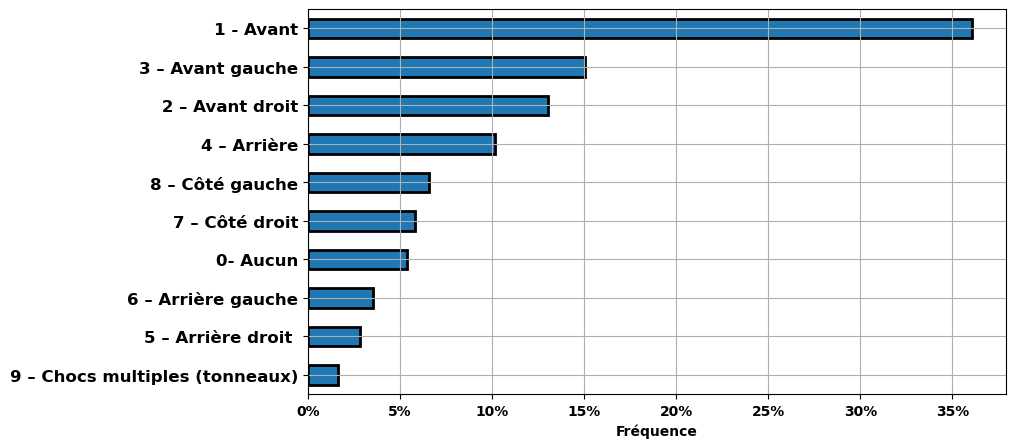

In [53]:
fig = plt.figure(figsize=(9, 5))

labels_obs = ['1 - Avant','3 – Avant gauche',' 2 – Avant droit','4 – Arrière','8 – Côté gauche',
              '7 – Côté droit','0- Aucun','6 – Arrière gauche','5 – Arrière droit ','9 – Chocs multiples (tonneaux)']

ax = df_veh['choc'].value_counts(normalize=True).plot(kind ='barh', edgecolor='black', linewidth=2)

xticks = ['{:,.0%}'.format(y) for y in ax.get_xticks()]
ax.set_xticklabels(xticks,fontsize=10, fontweight='bold')
ax.set_yticklabels(labels_obs,fontsize=12, fontweight='bold')

ax.set_xlabel('Fréquence',fontsize=10, fontweight='bold')
#ax.set_ylabel('Choc',fontsize=10, fontweight='bold')
ax.invert_yaxis()

ax.grid(True)
plt.show()

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/2343630365.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=10, fontweight='bold')


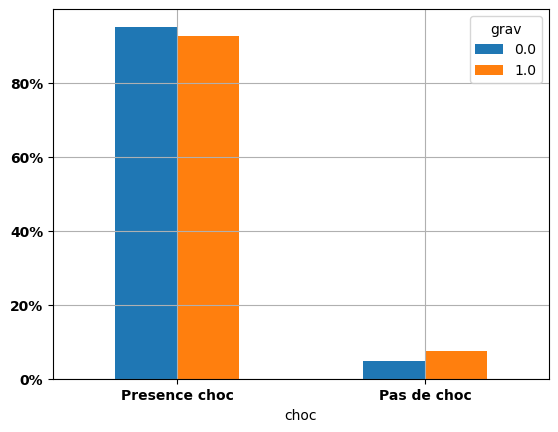

In [54]:
ax1= pd.crosstab([df_veh['choc'] == 0.0], df_veh['grav'] ,normalize= 'columns').plot.bar()  
ax1.set_xticklabels(['Presence choc','Pas de choc'], rotation = 0,fontsize=10, fontweight='bold')
ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=10, fontweight='bold')
ax1.grid
ax1.grid(True)

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/3503564696.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=12, fontweight='bold')
/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/3503564696.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xticks,fontsize=10, fontweight='bold')


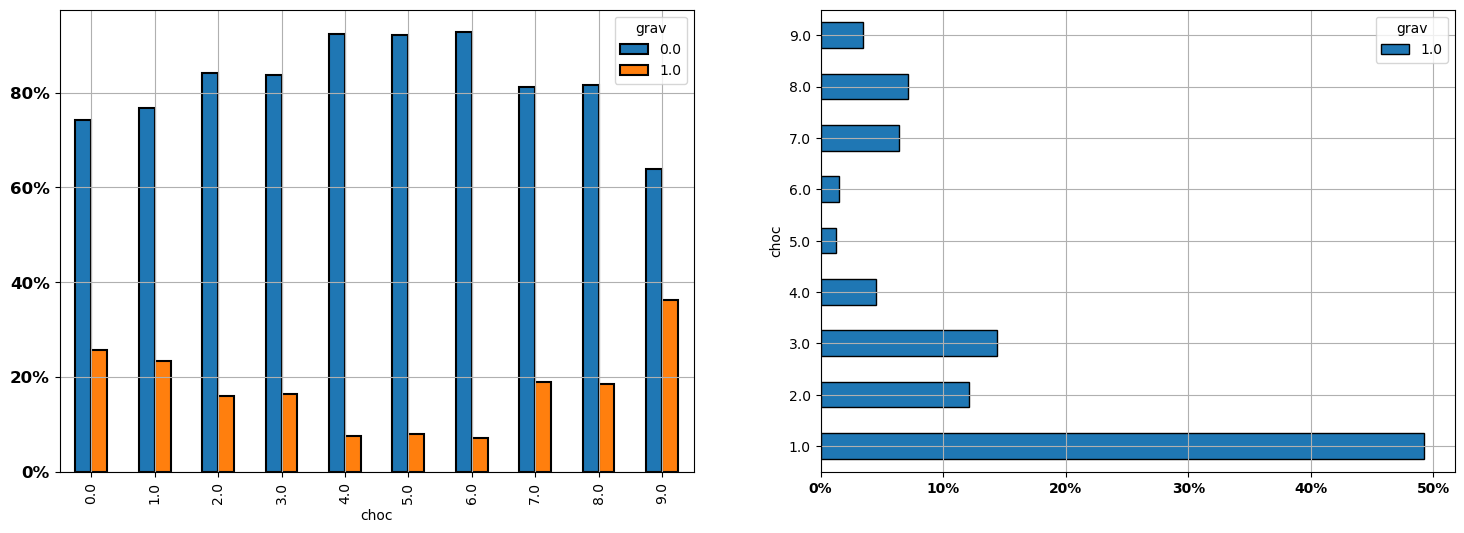

In [55]:
f, axes = plt.subplots(1, 2, figsize=(18, 6))

ax1 = pd.crosstab(df_veh['choc'], df_veh['grav'], normalize='index').plot(kind='bar',edgecolor='black', linewidth=1.5,
                                                        ax=axes[0])
ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=12, fontweight='bold')
#ax1.set_xticklabels(ax1.get_xticks(),fontsize=12, fontweight='bold',rotation = 0,)
ax1.grid(True)


ax2=pd.crosstab(df_veh.loc[dd['choc'] != 0.0, 'choc'], df_veh.loc[dd['grav'] == 1, 'grav'], 
                normalize='columns').plot(kind='barh',edgecolor='black', linewidth=1, ax=axes[1])
xticks = ['{:,.0%}'.format(y) for y in ax2.get_xticks()]
ax2.set_xticklabels(xticks,fontsize=10, fontweight='bold')
ax2.grid(True)
plt.show()

### D. Manoeuvres

[Cliquer pour aller sur la Table des matieres](#Table-des-matieres )

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/1051304598.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks,fontsize=12, fontweight='bold')


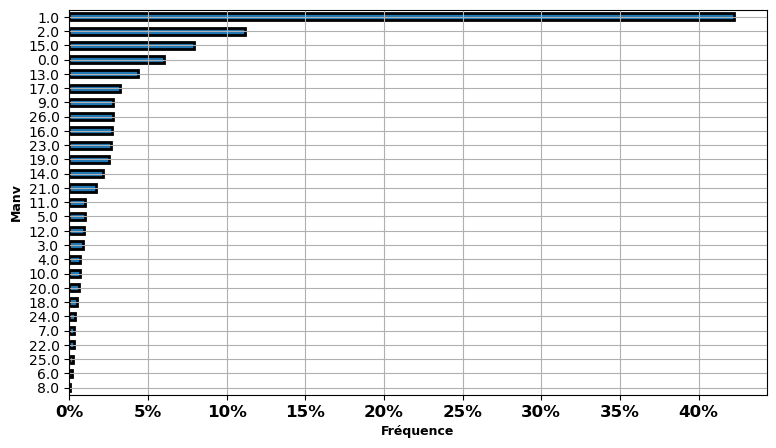

In [56]:
fig = plt.figure(figsize=(9, 5))

ax = df_veh['manv'].value_counts(normalize=True).plot(kind ='barh', edgecolor='black', linewidth=2)

xticks = ['{:,.0%}'.format(y) for y in ax.get_xticks()]
ax.set_xticklabels(xticks,fontsize=12, fontweight='bold')
#ax.set_yticklabels(yticks,fontsize=12, fontweight='bold')


ax.set_xlabel('Fréquence',fontsize=9, fontweight='bold')
ax.set_ylabel('Manv',fontsize=9, fontweight='bold')
ax.invert_yaxis()

ax.grid(True)
plt.show()

- **manv** - Manœuvre principale avant l’accident :

 - - -  -1 – Non renseigné
0 – Inconnue
1 – Sans changement de direction
2 – Même sens, même file
3 – Entre 2 files
4 – En marche arrière
5 – A contresens
6 – En franchissant le terre-plein central
7 – Dans le couloir bus, dans le même sens 8 – Dans le couloir bus, dans le sens inverse 9 – En s’insérant
10 – En faisant demi-tour sur la chaussée **Changeant de file** 11 – A gauche 12 – A droite **Déporté** 13 – A gauche 14 – A droite **Tournant** 15 – A gauche 16 – A droite **Dépassant** 17 – A gauche 18 – A droite **Divers** 19 – Traversant la chaussée 20 – Manœuvre de stationnement 21 – Manœuvre d’évitement 22 – Ouverture de porte 23 – Arrêté (hors stationnement) 24 – En stationnement (avec occupants) **25 – Circulant sur trottoir
26 – Autres manœuvres** 25,26 depuis 2019

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/1947306812.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=10, fontweight='bold')


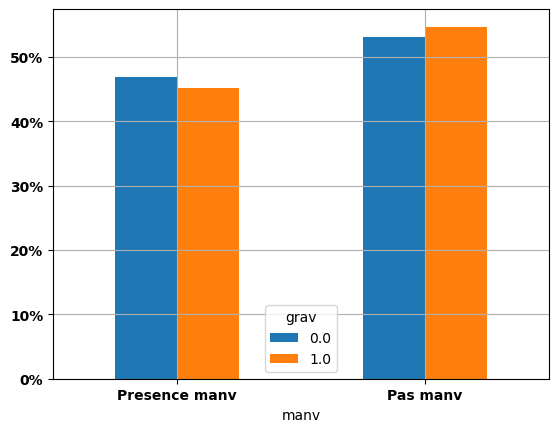

In [57]:
#ax1= pd.crosstab([df_veh['manv'] == 1.0], df_veh['grav'] ,normalize= 'columns').plot.bar()  

cross_tab = pd.crosstab(df_veh['manv'].isin([1.0, 2.0]), df_veh['grav'], normalize='columns')
ax1 = cross_tab.plot.bar()



ax1.set_xticklabels(['Presence manv','Pas manv'], rotation = 0,fontsize=10, fontweight='bold')
ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=10, fontweight='bold')
ax1.grid
ax1.grid(True)

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/1556685583.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=10, fontweight='bold')
/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/1556685583.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xticks,fontsize=10, fontweight='bold')


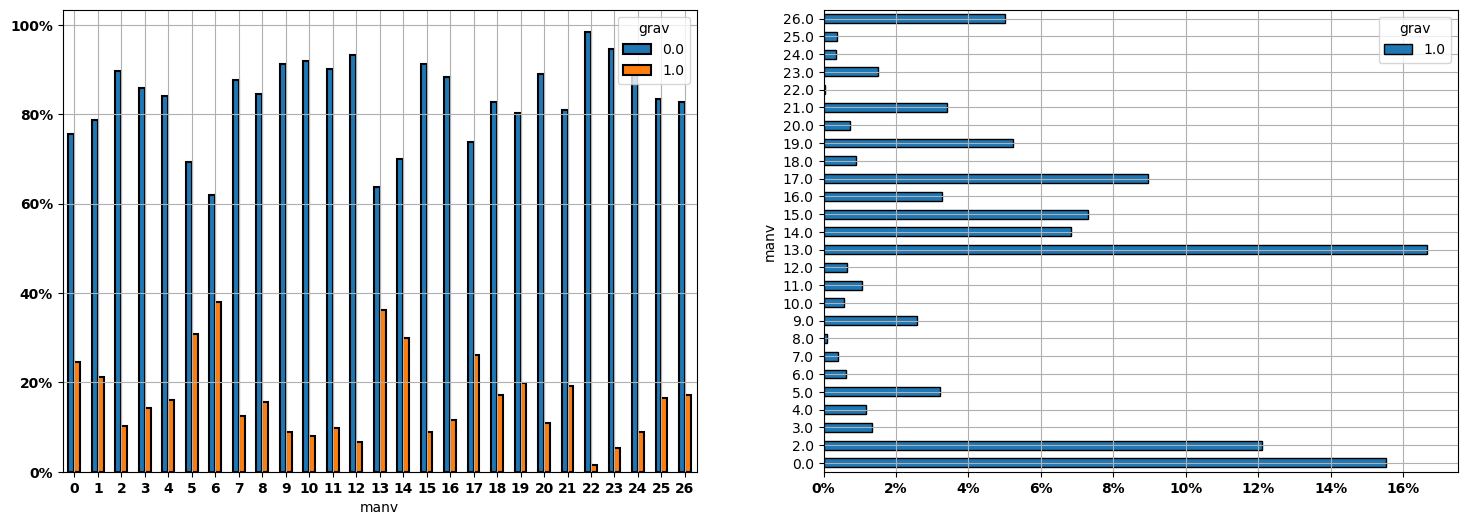

In [58]:
f, axes = plt.subplots(1, 2, figsize=(18, 6))


ax1 = pd.crosstab(df_veh['manv'], df_veh['grav'], normalize='index').plot(kind='bar',edgecolor='black', linewidth=1.5,
                                                        ax=axes[0])
ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=10, fontweight='bold')
ax1.set_xticklabels(ax1.get_xticks(),fontsize=10, fontweight='bold',rotation = 0,)
ax1.grid(True)


ax2=pd.crosstab(df_veh.loc[df_veh['manv'] != 1.0, 'manv'], df_veh.loc[df_veh['grav'] == 1, 'grav'], 
#ax2=pd.crosstab(df_veh['manv'], df_veh.loc[df_veh['grav'] == 1, 'grav'], 
                normalize='columns').plot(kind='barh',edgecolor='black', linewidth=1, ax=axes[1])
xticks = ['{:,.0%}'.format(y) for y in ax2.get_xticks()]
ax2.set_xticklabels(xticks,fontsize=10, fontweight='bold')

ax2.grid(True)
plt.show()

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/2501478033.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()])
/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/2501478033.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xticks)


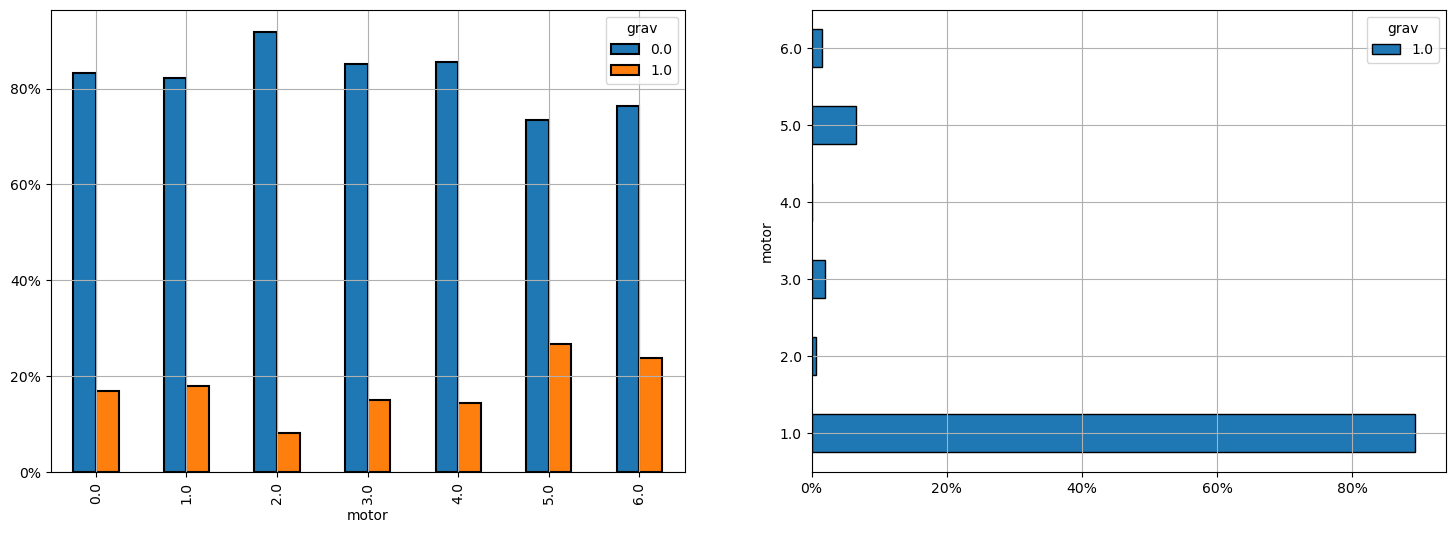

In [59]:
f, axes = plt.subplots(1, 2, figsize=(18, 6))

ax1 = pd.crosstab(df_veh['motor'], df_veh['grav'], normalize='index').plot(kind='bar',edgecolor='black', linewidth=1.5,
                                                        ax=axes[0])
ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()])
ax1.grid(True)


ax2=pd.crosstab(df_veh.loc[df_veh['motor']!= 0.0, 'motor'], df_veh.loc[df_veh['grav'] == 1, 'grav'], 
                normalize='columns').plot(kind='barh',edgecolor='black', linewidth=1, ax=axes[1])
xticks = ['{:,.0%}'.format(y) for y in ax2.get_xticks()]
ax2.set_xticklabels(xticks)
ax2.grid(True)
plt.show()

### E. Catégorie de véhicule

[Cliquer pour aller sur la Table des matieres](#Table-des-matieres )

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/2269469179.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks,fontsize=10, fontweight='bold')


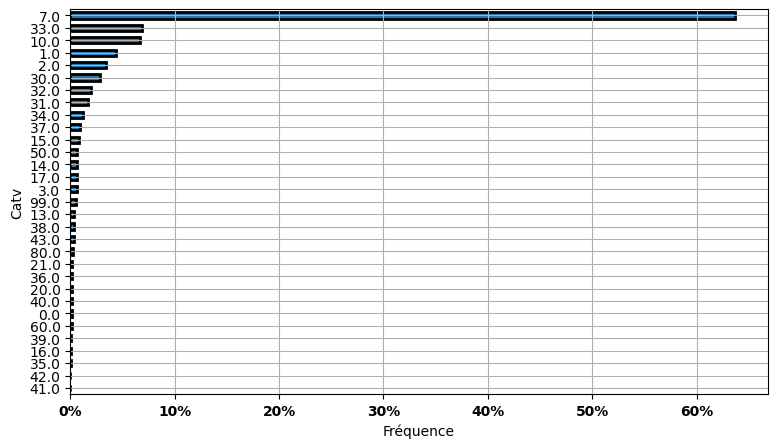

In [60]:
fig = plt.figure(figsize=(9, 5))

ax = df_veh['catv'].value_counts(normalize=True).plot(kind ='barh', edgecolor='black', linewidth=2)

xticks = ['{:,.0%}'.format(y) for y in ax.get_xticks()]
ax.set_xticklabels(xticks,fontsize=10, fontweight='bold')


ax.set_xlabel('Fréquence')
ax.set_ylabel('Catv')
ax.invert_yaxis()

ax.grid(True)
plt.show()

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/1507890697.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=10, fontweight='bold')
/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/1507890697.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xticks,fontsize=10, fontweight='bold')


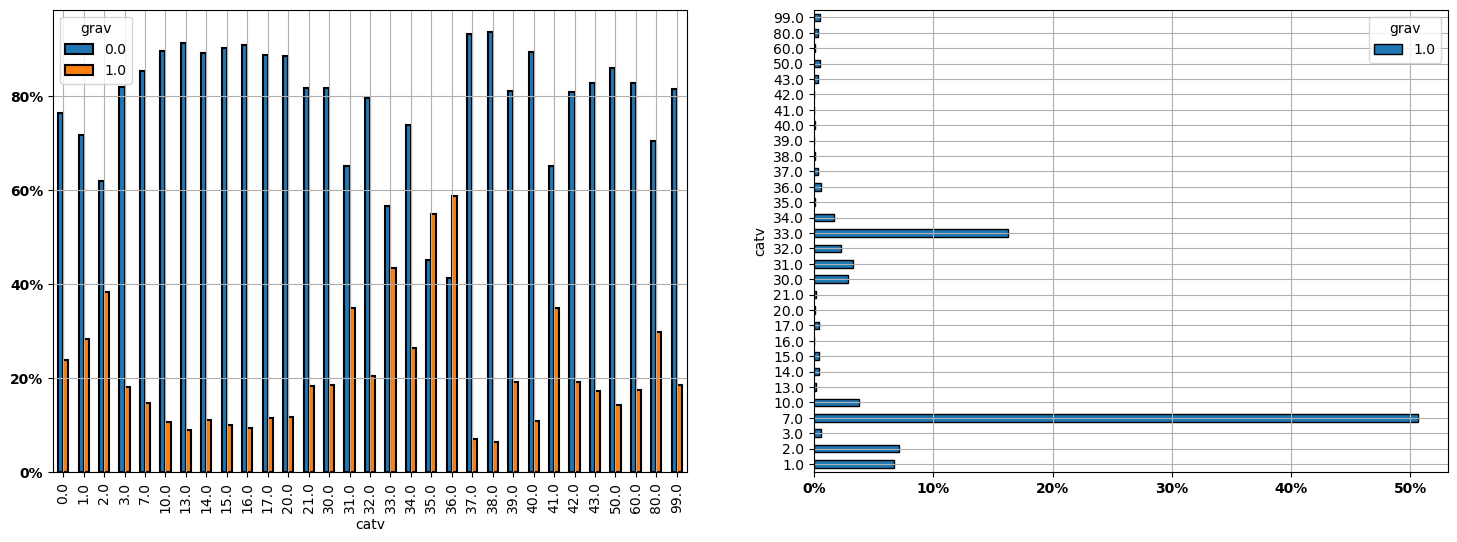

In [61]:
f, axes = plt.subplots(1, 2, figsize=(18, 6))

ax1 = pd.crosstab(df_veh['catv'], df_veh['grav'], normalize='index').plot(kind='bar',edgecolor='black', linewidth=1.5,
                                                        ax=axes[0])
ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=10, fontweight='bold')


#categories = df_veh['catv'].unique()
#positions = range(len(categories))
#ax1.set_xticks(positions)
#ax1.set_xticklabels(categories,fontsize=8, fontweight='bold',rotation = 45,)
ax1.grid(True)

ax2=pd.crosstab(df_veh.loc[df_veh['catv'] != 0.0, 'catv'], df_veh.loc[df_veh['grav'] == 1, 'grav'], 
#ax2=pd.crosstab(df_veh['catv'], df_veh.loc[df_veh['grav'] == 1, 'grav'], 
                normalize='columns').plot(kind='barh',edgecolor='black', linewidth=1, ax=axes[1])
xticks = ['{:,.0%}'.format(y) for y in ax2.get_xticks()]
ax2.set_xticklabels(xticks,fontsize=10, fontweight='bold')
#ax2.set_yticklabels(ax2.get_yticks(),fontsize=11, fontweight='bold')
ax2.grid(True)
plt.show()

> - **La graphique de gauche montre la proportion de chaque cat de vehicule impliqué dans les accidents graves et non graves. On peut observer que les type de vehicule 35 - "Quad léger <= 50 cm3" et 36 - "Quad lourd > 50 cm3" représentent presque 57% et 60% des cas graves, respectivement, par rapport à 43% et 40% des cas non graves pour ces types de vehicule. Cela suggère que ces deux types de vehicule ont plus de chances de conduire à des accidents graves.**
> - **La graphique de droite montre la proportion de chaque type de vehicule dans les accidents graves. Comme on peut voir deux types de vehicules les plus fréquents pour les cas graves sont 7 - VL, 33 - Motocyclette > 125 cm3  qui représentent 50% et 15% de tout les cas graves.**

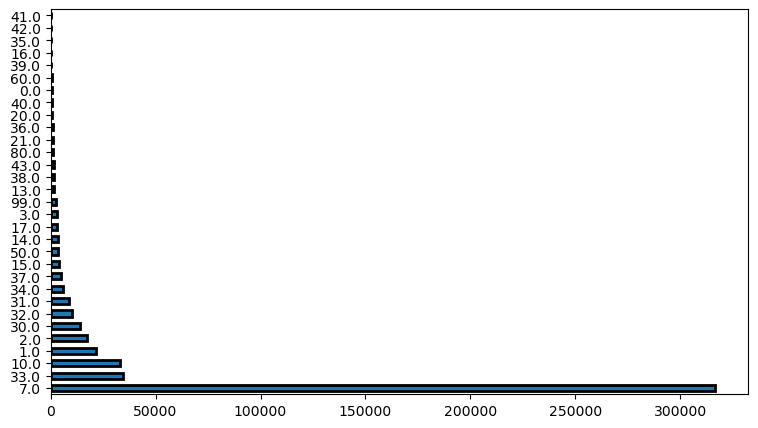

In [62]:
fig = plt.figure(figsize=(9, 5))

ax = df_veh['catv'].value_counts().plot(kind ='barh', edgecolor='black', linewidth=2)


In [63]:
df_veh['catv'].value_counts()

7.0     316657
33.0     34281
10.0     33154
1.0      21742
2.0      17105
30.0     14140
32.0     10054
31.0      8504
34.0      5922
37.0      4773
15.0      3968
50.0      3442
14.0      3363
17.0      3158
3.0       3016
99.0      2512
13.0      1783
38.0      1773
43.0      1667
80.0      1192
21.0      1052
36.0       866
20.0       843
40.0       772
0.0        680
60.0       584
39.0       173
16.0       173
35.0       122
42.0        73
41.0        43
Name: catv, dtype: int64

## F. Quantité de voitures 

[Cliquer pour aller sur la Table des matieres](#Table-des-matieres )

In [64]:
nb_veh = df_veh.groupby(['Num_Acc']).count()['num_veh'].reset_index()
nb_veh = nb_veh.rename(columns={'num_veh': 'nb_veh'})


df_veh = df_veh.merge(nb_veh, on='Num_Acc', how='left')

df_veh.head()

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh,id_vehicule,motor,grav,vma,nb_veh
0,201800000001,0.0,7.0,0.0,0.0,2.0,3.0,1.0,B01,NaN,NaN,1.0,NaN,2
1,201800000001,0.0,7.0,0.0,0.0,2.0,2.0,15.0,A01,NaN,NaN,0.0,NaN,2
2,201800000002,0.0,7.0,0.0,0.0,1.0,0.0,1.0,A01,NaN,NaN,0.0,NaN,2
3,201800000002,0.0,7.0,0.0,0.0,1.0,0.0,1.0,A01,NaN,NaN,0.0,NaN,2
4,201800000003,0.0,33.0,0.0,1.0,2.0,1.0,1.0,A01,NaN,NaN,1.0,NaN,2


In [65]:
#nb_veh['nb_veh'].value_counts()

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/1214464837.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks,fontsize=10, fontweight='bold')


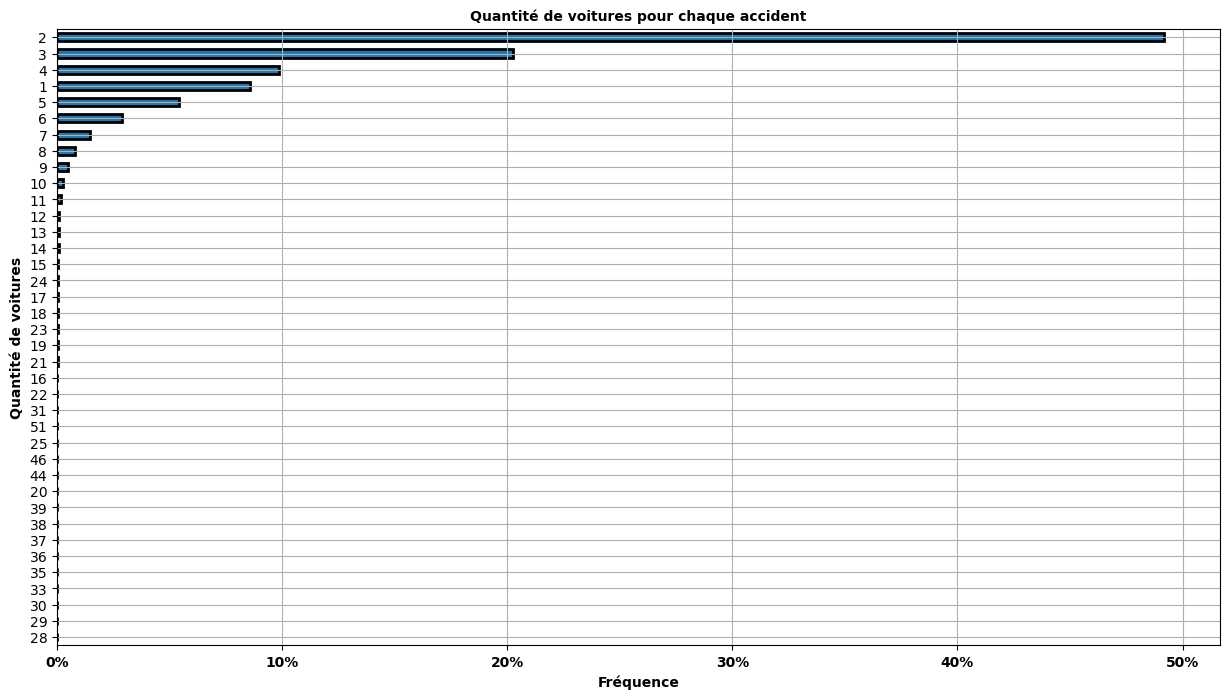

In [66]:
fig = plt.figure(figsize=(15, 8))

ax = df_veh['nb_veh'].value_counts(normalize=True).plot(kind ='barh', edgecolor='black', linewidth=2)
#ax = nb_veh['nb_veh'].value_counts(normalize=True).plot(kind ='barh', edgecolor='black', linewidth=2)

xticks = ['{:,.0%}'.format(y) for y in ax.get_xticks()]
ax.set_xticklabels(xticks,fontsize=10, fontweight='bold')


ax.set_xlabel('Fréquence',fontsize=10, fontweight='bold')
ax.set_ylabel('Quantité de voitures',fontsize=10, fontweight='bold')
ax.set_title('Quantité de voitures pour chaque accident',fontsize=10, fontweight='bold')
ax.invert_yaxis()

ax.grid(True)
plt.show()

In [67]:
pd.set_option('display.max_rows', None)
print(df_veh['nb_veh'].value_counts())
nb_veh['nb_veh'].value_counts()

2     244738
3     100854
4      49168
1      42638
5      26935
6      14292
7       7196
8       3992
9       2421
10      1430
11       847
12       504
13       416
14       378
15       225
24       168
17       153
18       144
23       115
19       114
21       105
16        96
22        66
31        62
51        51
25        50
46        46
44        44
20        40
39        39
38        38
37        37
36        36
35        35
33        33
30        30
29        29
28        28
Name: nb_veh, dtype: int64


2     122369
1      42638
3      33618
4      12292
5       5387
6       2382
7       1028
8        499
9        269
10       143
11        77
12        42
13        32
14        27
15        15
17         9
18         8
24         7
19         6
16         6
21         5
23         5
22         3
25         2
20         2
31         2
38         1
44         1
28         1
36         1
37         1
51         1
46         1
39         1
29         1
30         1
33         1
35         1
Name: nb_veh, dtype: int64

/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/617312534.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=10, fontweight='bold')
/var/folders/2n/0w86yxss6pddskdxlsrykcmw0000gn/T/ipykernel_14741/617312534.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xticks)


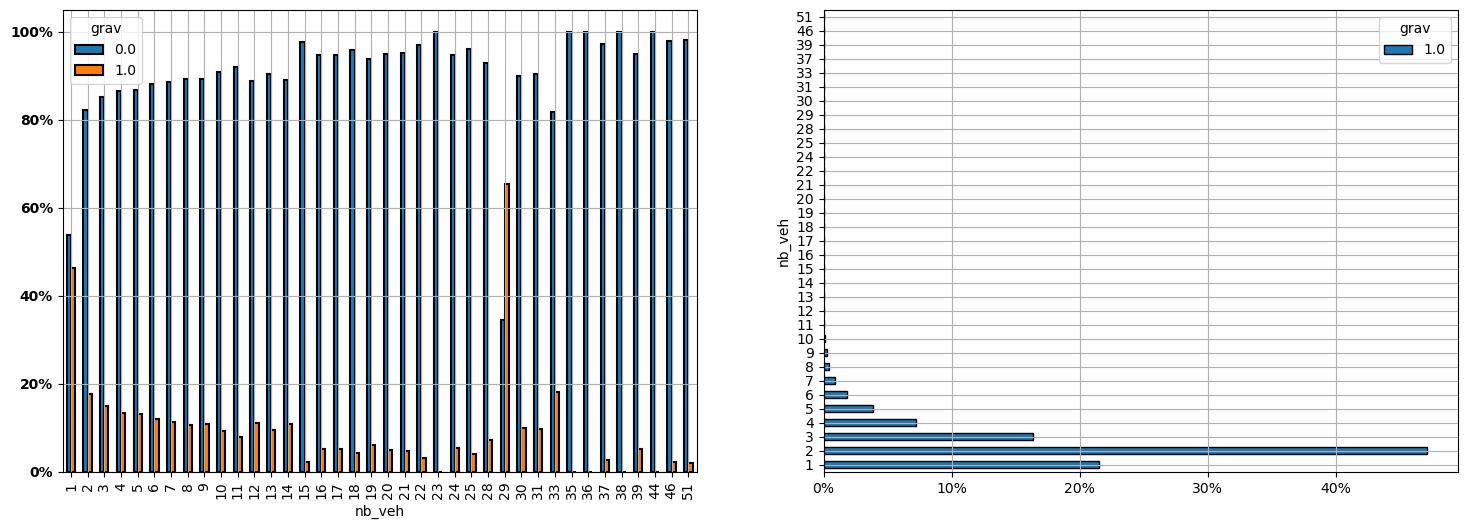

In [68]:
dd = df_veh
f, axes = plt.subplots(1, 2, figsize=(18, 6))

ax1 = pd.crosstab(dd['nb_veh'], dd['grav'], normalize='index').plot(kind='bar',edgecolor='black', linewidth=1.5,
                                                        ax=axes[0])


ax1.set_yticklabels(['{:,.0%}'.format(y) for y in ax1.get_yticks()],fontsize=10, fontweight='bold')
#ax1.set_xticklabels(ax1.get_xticks(),fontsize=10, fontweight='bold',rotation = 45,)


ax1.grid(True)


ax2=pd.crosstab(dd['nb_veh'], dd.loc[dd['grav'] == 1, 'grav'], 
                normalize='columns').plot(kind='barh',edgecolor='black', linewidth=1, ax=axes[1])
xticks = ['{:,.0%}'.format(y) for y in ax2.get_xticks()]
ax2.set_xticklabels(xticks)
ax2.grid(True)
plt.show()